In [19]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# „ÉÜ„Çπ„Éà„Éá„Éº„Çø‰ΩúÊàê

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# „Ç∑„Éº„ÉâÂõ∫ÂÆöÔºàÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅÔºâ
np.random.seed(42)
random.seed(42)

def generate_repair_data(n_repairs=1000):
    """
    ‰øÆÁêÜ„Éá„Éº„Çø„ÇíÁîüÊàê„Åô„ÇãÈñ¢Êï∞
    
    Parameters:
    n_repairs: ‰øÆÁêÜ‰ª∂Êï∞ÔºàÂÆüÈöõ„ÅÆË°åÊï∞„ÅØ„Åì„Çå„Çà„ÇäÂ§ö„Åè„Å™„ÇãÂèØËÉΩÊÄß„ÅÇ„ÇäÔºâ
    """
    
    # Âü∫Êú¨Ë®≠ÂÆö
    models = ['M100', 'M150', 'M200', 'M250']
    areas = ['JP', 'CN', 'USA', 'EUR']
    
    # Ê©üÁ®Æ„Åî„Å®„ÅÆË£ΩÈÄ†ÈñãÂßãÂπ¥Êúà„Å®ÈÉ®ÂìÅÁï™Âè∑
    model_config = {
        'M100': {
            'start_date': '2020-01',
            'parts': [f'10{str(i).zfill(6)}' for i in range(1, 51)]  # 10000001-10000050
        },
        'M150': {
            'start_date': '2021-03',
            'parts': [f'15{str(i).zfill(6)}' for i in range(1, 61)]  # 15000001-15000060
        },
        'M200': {
            'start_date': '2022-01',
            'parts': [f'20{str(i).zfill(6)}' for i in range(1, 71)]  # 20000001-20000070
        },
        'M250': {
            'start_date': '2022-06',
            'parts': [f'25{str(i).zfill(6)}' for i in range(1, 81)]  # 25000001-25000080
        }
    }
    
    # ‰øÆÁêÜÂÖ•Â∫´Êó•„ÅÆÁØÑÂõ≤
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2025, 5, 31)
    
    data = []
    
    for repair_id in range(1, n_repairs + 1):
        # ‰øÆÁêÜÂÖ•Â∫´Êó•„Çí„É©„É≥„ÉÄ„É†ÁîüÊàê
        repair_date = start_date + timedelta(
            days=random.randint(0, (end_date - start_date).days)
        )
        
        # Ê©üÁ®Æ„Å®Âú∞Âüü„Çí„É©„É≥„ÉÄ„É†ÈÅ∏Êäû
        model = random.choice(models)
        area = random.choice(areas)
        
        # Ë£ΩÈÄ†Âπ¥Êúà„ÇíÁîüÊàêÔºà‰øÆÁêÜÂÖ•Â∫´Êó•„Çà„ÇäÂâçÔºâ
        model_start = pd.to_datetime(model_config[model]['start_date'])
        # Ë£ΩÈÄ†Âπ¥Êúà„ÅØÊ©üÁ®Æ„ÅÆË£ΩÈÄ†ÈñãÂßã„Åã„Çâ‰øÆÁêÜÂÖ•Â∫´Êó•„Åæ„Åß
        if repair_date > model_start:
            months_diff = (repair_date.year - model_start.year) * 12 + (repair_date.month - model_start.month)
            prod_month_offset = random.randint(0, max(0, months_diff - 1))
            prod_month = model_start + pd.DateOffset(months=prod_month_offset)
        else:
            prod_month = model_start
        
        # IF_ID„Çí8Ê°Å„ÅßÁîüÊàê
        if_id = f'{repair_id:08d}'
        
        # ‰ΩøÁî®ÈÉ®ÂìÅÊï∞„ÇíÊ±∫ÂÆöÔºà1-5ÂÄã„ÄÅÈáç„Åø‰ªò„Åç„É©„É≥„ÉÄ„É†Ôºâ
        parts_count = np.random.choice([1, 2, 3, 4, 5], p=[0.4, 0.3, 0.15, 0.1, 0.05])
        
        # ÈÉ®ÂìÅ„Çí„É©„É≥„ÉÄ„É†ÈÅ∏ÊäûÔºàÈáçË§á„Å™„ÅóÔºâ
        selected_parts = random.sample(model_config[model]['parts'], parts_count)
        
        # ÂêÑÈÉ®ÂìÅ„Å´„Å§„ÅÑ„Å¶Ë°å„Çí‰ΩúÊàê
        for part_no in selected_parts:
            data.append({
                'date': repair_date,
                'prod_month': prod_month.to_period('M'),
                'Model': model,
                'Area': area,
                'parts_no': part_no,
                'IF_ID': if_id
            })
    
    # DataFrame„Çí‰ΩúÊàê
    df = pd.DataFrame(data)
    
    # „Éá„Éº„ÇøÂûã„ÇíË®≠ÂÆö
    df['date'] = pd.to_datetime(df['date'])
    df['prod_month'] = df['prod_month'].astype('period[M]')
    df['Model'] = df['Model'].astype('object')
    df['Area'] = df['Area'].astype('object')
    df['parts_no'] = df['parts_no'].astype('object')
    df['IF_ID'] = df['IF_ID'].astype('object')
    
    # Êó•‰ªò„Åß„ÇΩ„Éº„Éà
    df = df.sort_values('date').reset_index(drop=True)
    
    return df

# „Éá„Éº„ÇøÁîüÊàêÂÆüË°å
repair_df = generate_repair_data(n_repairs=3000)

# „Éá„Éº„Çø„ÅÆÁ¢∫Ë™ç
print("=== „Éá„Éº„ÇøÂü∫Êú¨ÊÉÖÂ†± ===")
print(f"Á∑èË°åÊï∞: {len(repair_df)}")
print(f"‰øÆÁêÜ‰ª∂Êï∞: {repair_df['IF_ID'].nunique()}")
print(f"„Éá„Éº„ÇøÊúüÈñì: {repair_df['date'].min()} ÔΩû {repair_df['date'].max()}")

print("\n=== „Éá„Éº„ÇøÂûãÁ¢∫Ë™ç ===")
print(repair_df.dtypes)

print("\n=== ÂÖàÈ†≠10Ë°å ===")
print(repair_df.head(10))

print("\n=== Ê©üÁ®ÆÂà•Áµ±Ë®à ===")
model_stats = repair_df.groupby('Model').agg({
    'IF_ID': 'nunique',  # ‰øÆÁêÜ‰ª∂Êï∞
    'parts_no': 'count',  # ÈÉ®ÂìÅ‰ΩøÁî®Êï∞
    'prod_month': ['min', 'max']
}).round(2)
model_stats.columns = ['‰øÆÁêÜ‰ª∂Êï∞', 'ÈÉ®ÂìÅ‰ΩøÁî®Êï∞', 'Ë£ΩÈÄ†Âπ¥Êúà_ÊúÄÂ∞è', 'Ë£ΩÈÄ†Âπ¥Êúà_ÊúÄÂ§ß']
print(model_stats)

print("\n=== Âú∞ÂüüÂà•Áµ±Ë®à ===")
area_stats = repair_df.groupby('Area').agg({
    'IF_ID': 'nunique',
    'parts_no': 'count'
}).round(2)
area_stats.columns = ['‰øÆÁêÜ‰ª∂Êï∞', 'ÈÉ®ÂìÅ‰ΩøÁî®Êï∞']
print(area_stats)

print("\n=== 1‰øÆÁêÜ„ÅÇ„Åü„Çä„ÅÆÈÉ®ÂìÅÊï∞ÂàÜÂ∏É ===")
parts_per_repair = repair_df.groupby('IF_ID').size()
print(parts_per_repair.value_counts().sort_index())

print("\n=== „Çµ„É≥„Éó„É´ÔºöË§áÊï∞ÈÉ®ÂìÅ„Çí‰ΩøÁî®„Åó„Åü‰øÆÁêÜ ===")
multi_parts_repair = repair_df[repair_df['IF_ID'].isin(
    repair_df.groupby('IF_ID').size()[repair_df.groupby('IF_ID').size() > 1].index[:3]
)]
print(multi_parts_repair.sort_values(['IF_ID', 'parts_no']))

# CSV„Éï„Ç°„Ç§„É´„Å®„Åó„Å¶‰øùÂ≠ò
repair_df.to_csv('repair_test_data.csv', index=False, encoding='utf-8-sig')
print(f"\n=== CSV„Éï„Ç°„Ç§„É´‰øùÂ≠òÂÆå‰∫Ü ===")
print("„Éï„Ç°„Ç§„É´Âêç: repair_test_data.csv")

=== „Éá„Éº„ÇøÂü∫Êú¨ÊÉÖÂ†± ===
Á∑èË°åÊï∞: 6326
‰øÆÁêÜ‰ª∂Êï∞: 3000
„Éá„Éº„ÇøÊúüÈñì: 2023-01-01 00:00:00 ÔΩû 2025-05-31 00:00:00

=== „Éá„Éº„ÇøÂûãÁ¢∫Ë™ç ===
date          datetime64[ns]
prod_month         period[M]
Model                 object
Area                  object
parts_no              object
IF_ID                 object
dtype: object

=== ÂÖàÈ†≠10Ë°å ===
        date prod_month Model Area  parts_no     IF_ID
0 2023-01-01    2022-07  M200  EUR  20000021  00002705
1 2023-01-01    2021-08  M150   CN  15000020  00002268
2 2023-01-01    2021-08  M150   CN  15000006  00002268
3 2023-01-01    2021-08  M150   CN  15000012  00002268
4 2023-01-01    2020-01  M100   JP  10000018  00002704
5 2023-01-01    2022-07  M200  EUR  20000013  00002705
6 2023-01-01    2022-07  M200  EUR  20000007  00002705
7 2023-01-01    2022-03  M200   CN  20000044  00000602
8 2023-01-01    2022-05  M200   JP  20000004  00001086
9 2023-01-01    2022-09  M200  EUR  20000063  00002834

=== Ê©üÁ®ÆÂà•Áµ±Ë®à ===
       

# Âü∫Êú¨Áµ±Ë®à„Å´„Çà„ÇãÊ®™ÊØîËºÉ

##  Âü∫Êú¨ÁöÑ„Å™ÊØîËºÉËª∏„ÅÆÊï¥ÁêÜ

In [2]:
# ÊØîËºÉËª∏„ÅÆ‰æã
comparison_axes = {
    'Ë£ΩÈÄ†Âπ¥ÊúàÊØîËºÉ':['Model', 'Area', 'parts_no'],
    'Âú∞ÂüüÊØîËºÉ':['Model', 'prod_month', 'parts_no'],
    'Ê©üÁ®ÆÊØîËºÉ':['prod_month', 'Area', 'parts_no'],
}

## Áµ±Ë®àÁöÑÂ§ñ„ÇåÂÄ§Ê§úÂá∫ÊâãÊ≥ï

In [3]:
def detect_outliers_zscore(df, group_cols, threshold=2.5):
    """Z-ScoreÊñπÂºè„Å´„Çà„ÇãÂ§ñ„ÇåÂÄ§Ê§úÂá∫"""
    
    parts_usage = df.groupby(group_cols + ['parts_no']).agg({
        'IF_ID': 'nunique'
    }).reset_index()
    parts_usage.rename(columns={'IF_ID': 'repair_count'}, inplace=True)
    
    results = []
    
    for parts in parts_usage['parts_no'].unique():
        parts_data = parts_usage[parts_usage['parts_no'] == parts]
        
        if len(parts_data) < 3:
            continue
        
        # „É≠„Ç∞Â§âÊèõÔºà„Çº„É≠ÂÄ§ÂØæÁ≠ñÔºâ
        log_counts = np.log1p(parts_data['repair_count'])
        
        # Z-ScoreË®àÁÆó
        mean_log = log_counts.mean()
        std_log = log_counts.std()
        
        if std_log == 0:  # Ê®ôÊ∫ñÂÅèÂ∑Æ„Åå0„ÅÆÂ†¥Âêà
            continue
            
        z_scores = (log_counts - mean_log) / std_log
        
        # Â§ñ„ÇåÂÄ§Ê§úÂá∫
        outlier_mask = np.abs(z_scores) > threshold
        outliers = parts_data[outlier_mask]
        
        for i, (_, row) in enumerate(outliers.iterrows()):
            results.append({
                'parts_no': parts,
                'z_score': z_scores.iloc[outlier_mask][i],
                'actual_count': row['repair_count'],
                'expected_mean': np.expm1(mean_log),  # ÂÖÉ„ÅÆ„Çπ„Ç±„Éº„É´„Å´Êàª„Åô
                **{col: row[col] for col in group_cols}
            })
    
    return pd.DataFrame(results)

## Z-Score „Å´„Çà„ÇãÊ§úÂá∫

In [4]:
def detect_outliers_iqr(df, group_cols, target_col='parts_count'):
    """IQRÊñπÂºè„Å´„Çà„ÇãÂ§ñ„ÇåÂÄ§Ê§úÂá∫"""
    
    # ÈÉ®ÂìÅ‰ΩøÁî®Êï∞„ÇíÈõÜË®à
    parts_usage = df.groupby(group_cols + ['parts_no']).agg({
        'IF_ID': 'nunique'  # ‰øÆÁêÜÊï∞
    }).reset_index()
    parts_usage.rename(columns={'IF_ID': 'repair_count'}, inplace=True)
    
    results = []
    
    for parts in parts_usage['parts_no'].unique():
        parts_data = parts_usage[parts_usage['parts_no'] == parts]
        
        if len(parts_data) < 4:  # „Éá„Éº„ÇøÊï∞„ÅåÂ∞ë„Å™„ÅÑÂ†¥Âêà„ÅØ„Çπ„Ç≠„ÉÉ„Éó
            continue
            
        # IQRË®àÁÆó
        Q1 = parts_data['repair_count'].quantile(0.25)
        Q3 = parts_data['repair_count'].quantile(0.75)
        IQR = Q3 - Q1
        
        # Â§ñ„ÇåÂÄ§„ÅÆÈñæÂÄ§
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Â§ñ„ÇåÂÄ§Ê§úÂá∫
        outliers = parts_data[
            (parts_data['repair_count'] < lower_bound) | 
            (parts_data['repair_count'] > upper_bound)
        ]
        
        for _, row in outliers.iterrows():
            results.append({
                'parts_no': parts,
                'outlier_type': 'high' if row['repair_count'] > upper_bound else 'low',
                'actual_count': row['repair_count'],
                'expected_range': f"{lower_bound:.1f} - {upper_bound:.1f}",
                'severity': abs(row['repair_count'] - (Q1 + Q3)/2) / IQR,
                **{col: row[col] for col in group_cols}
            })
    
    return pd.DataFrame(results)

## ‰øÆÊ≠£Z-ScoreÔºàMADÂü∫Ê∫ñÔºâ

In [5]:
def detect_outliers_modified_zscore(df, group_cols, threshold=3.5):
    """‰øÆÊ≠£Z-ScoreÔºàMADÂü∫Ê∫ñÔºâ„Å´„Çà„ÇãÂ§ñ„ÇåÂÄ§Ê§úÂá∫"""
    
    def modified_z_score(data):
        median = np.median(data)
        mad = np.median(np.abs(data - median))
        if mad == 0:
            return np.zeros(len(data))
        return 0.6745 * (data - median) / mad
    
    parts_usage = df.groupby(group_cols + ['parts_no']).agg({
        'IF_ID': 'nunique'
    }).reset_index()
    parts_usage.rename(columns={'IF_ID': 'repair_count'}, inplace=True)
    
    results = []
    
    for parts in parts_usage['parts_no'].unique():
        parts_data = parts_usage[parts_usage['parts_no'] == parts]
        
        if len(parts_data) < 3:
            continue
        
        mod_z_scores = modified_z_score(parts_data['repair_count'].values)
        
        outlier_mask = np.abs(mod_z_scores) > threshold
        outliers = parts_data[outlier_mask]
        
        for i, (_, row) in enumerate(outliers.iterrows()):
            results.append({
                'parts_no': parts,
                'modified_z_score': mod_z_scores[outlier_mask][i],
                'actual_count': row['repair_count'],
                'median_count': np.median(parts_data['repair_count']),
                **{col: row[col] for col in group_cols}
            })
    
    return pd.DataFrame(results)

## ÂÆüÁî®ÁöÑ„Å™‰Ωø„ÅÑÊñπ
ÂÆüÈöõ„ÅÆÈÅãÁî®„Åß„ÅØ„ÄÅË§áÊï∞„ÅÆËª∏„ÅßÊØîËºÉ„Åô„Çã„Åì„Å®„ÅåÈáçË¶Å„Åß„Åô

In [6]:
# ‰ΩøÁî®‰æã
def comprehensive_outlier_detection(df):
    """ÂåÖÊã¨ÁöÑ„Å™Â§ñ„ÇåÂÄ§Ê§úÂá∫"""
    
    all_outliers = []
    
    # 1. Ë£ΩÈÄ†Âπ¥ÊúàÊØîËºÉÔºàÂêå‰∏ÄÊ©üÁ®Æ„ÉªÂú∞ÂüüÂÜÖ„ÅßÔºâ
    outliers_month = detect_outliers_modified_zscore(
        df, ['Model', 'Area'], threshold=3.0
    )
    outliers_month['comparison_type'] = 'by_prod_month'
    all_outliers.append(outliers_month)
    
    # 2. Âú∞ÂüüÊØîËºÉÔºàÂêå‰∏ÄÊ©üÁ®Æ„ÉªË£ΩÈÄ†Âπ¥ÊúàÂÜÖ„ÅßÔºâ
    outliers_area = detect_outliers_modified_zscore(
        df, ['Model', 'prod_month'], threshold=3.0  
    )
    outliers_area['comparison_type'] = 'by_area'
    all_outliers.append(outliers_area)
    
    # 3. Ê©üÁ®ÆÊØîËºÉÔºàÂêå‰∏ÄÂú∞Âüü„ÉªË£ΩÈÄ†Âπ¥ÊúàÂÜÖ„ÅßÔºâ
    outliers_model = detect_outliers_modified_zscore(
        df, ['Area', 'prod_month'], threshold=3.0
    )
    outliers_model['comparison_type'] = 'by_model'
    all_outliers.append(outliers_model)
    
    return pd.concat(all_outliers, ignore_index=True)

## Âãï‰Ωú„ÉÜ„Çπ„Éà

In [7]:
def multi_axis_outlier_detection(df):
    """Ë§áÊï∞Ëª∏„Åß„ÅÆÁï∞Â∏∏Ê§úÁü•"""
    
    results = []
    
    # ÊØîËºÉËª∏„ÅÆÂÆöÁæ©
    comparisons = {
        'Ë£ΩÈÄ†Âπ¥ÊúàÊØîËºÉ': ['Model', 'Area'],
        'Âú∞ÂüüÊØîËºÉ': ['Model', 'prod_month'], 
        'Ê©üÁ®ÆÊØîËºÉ': ['Area', 'prod_month']
    }
    
    for comparison_name, group_cols in comparisons.items():
        print(f"\n=== {comparison_name} ===")
        
        outliers = detect_outliers_modified_zscore(
            df, group_cols=group_cols, threshold=3.0
        )
        
        # ÊØîËºÉ„Çø„Ç§„Éó„ÇíËøΩÂä†
        outliers['comparison_type'] = comparison_name
        outliers['group_cols'] = str(group_cols)
        
        results.append(outliers)
        
        print(f"Ê§úÂá∫„Åï„Çå„ÅüÁï∞Â∏∏: {len(outliers)}‰ª∂")
    
    return pd.concat(results, ignore_index=True)

df_parts = repair_df.copy()
# ‰ΩøÁî®‰æã
all_outliers = multi_axis_outlier_detection(df_parts)


=== Ë£ΩÈÄ†Âπ¥ÊúàÊØîËºÉ ===
Ê§úÂá∫„Åï„Çå„ÅüÁï∞Â∏∏: 45‰ª∂

=== Âú∞ÂüüÊØîËºÉ ===
Ê§úÂá∫„Åï„Çå„ÅüÁï∞Â∏∏: 3‰ª∂

=== Ê©üÁ®ÆÊØîËºÉ ===
Ê§úÂá∫„Åï„Çå„ÅüÁï∞Â∏∏: 0‰ª∂


# Âú∞ÂüüÂ∑ÆÂàÜÊûêÁî®„ÅÆÂåÖÊã¨ÁöÑ„Å™„Ç∑„Çπ„ÉÜ„É†

=== Regional Anomaly Detection System ===

Sample data generated: 6326 records

„Éá„Éº„ÇøÊ¶ÇË¶Å:
- Ê©üÁ®ÆÊï∞: 4
- Âú∞ÂüüÊï∞: 4
- ÈÉ®ÂìÅÁ®ÆÈ°ûÊï∞: 260
- Ë£ΩÈÄ†Âπ¥ÊúàÊï∞: 64
- Ë£ΩÈÄ†Âπ¥ÊúàÁØÑÂõ≤: 2020-01 ~ 2025-04
Outliers detected: 0



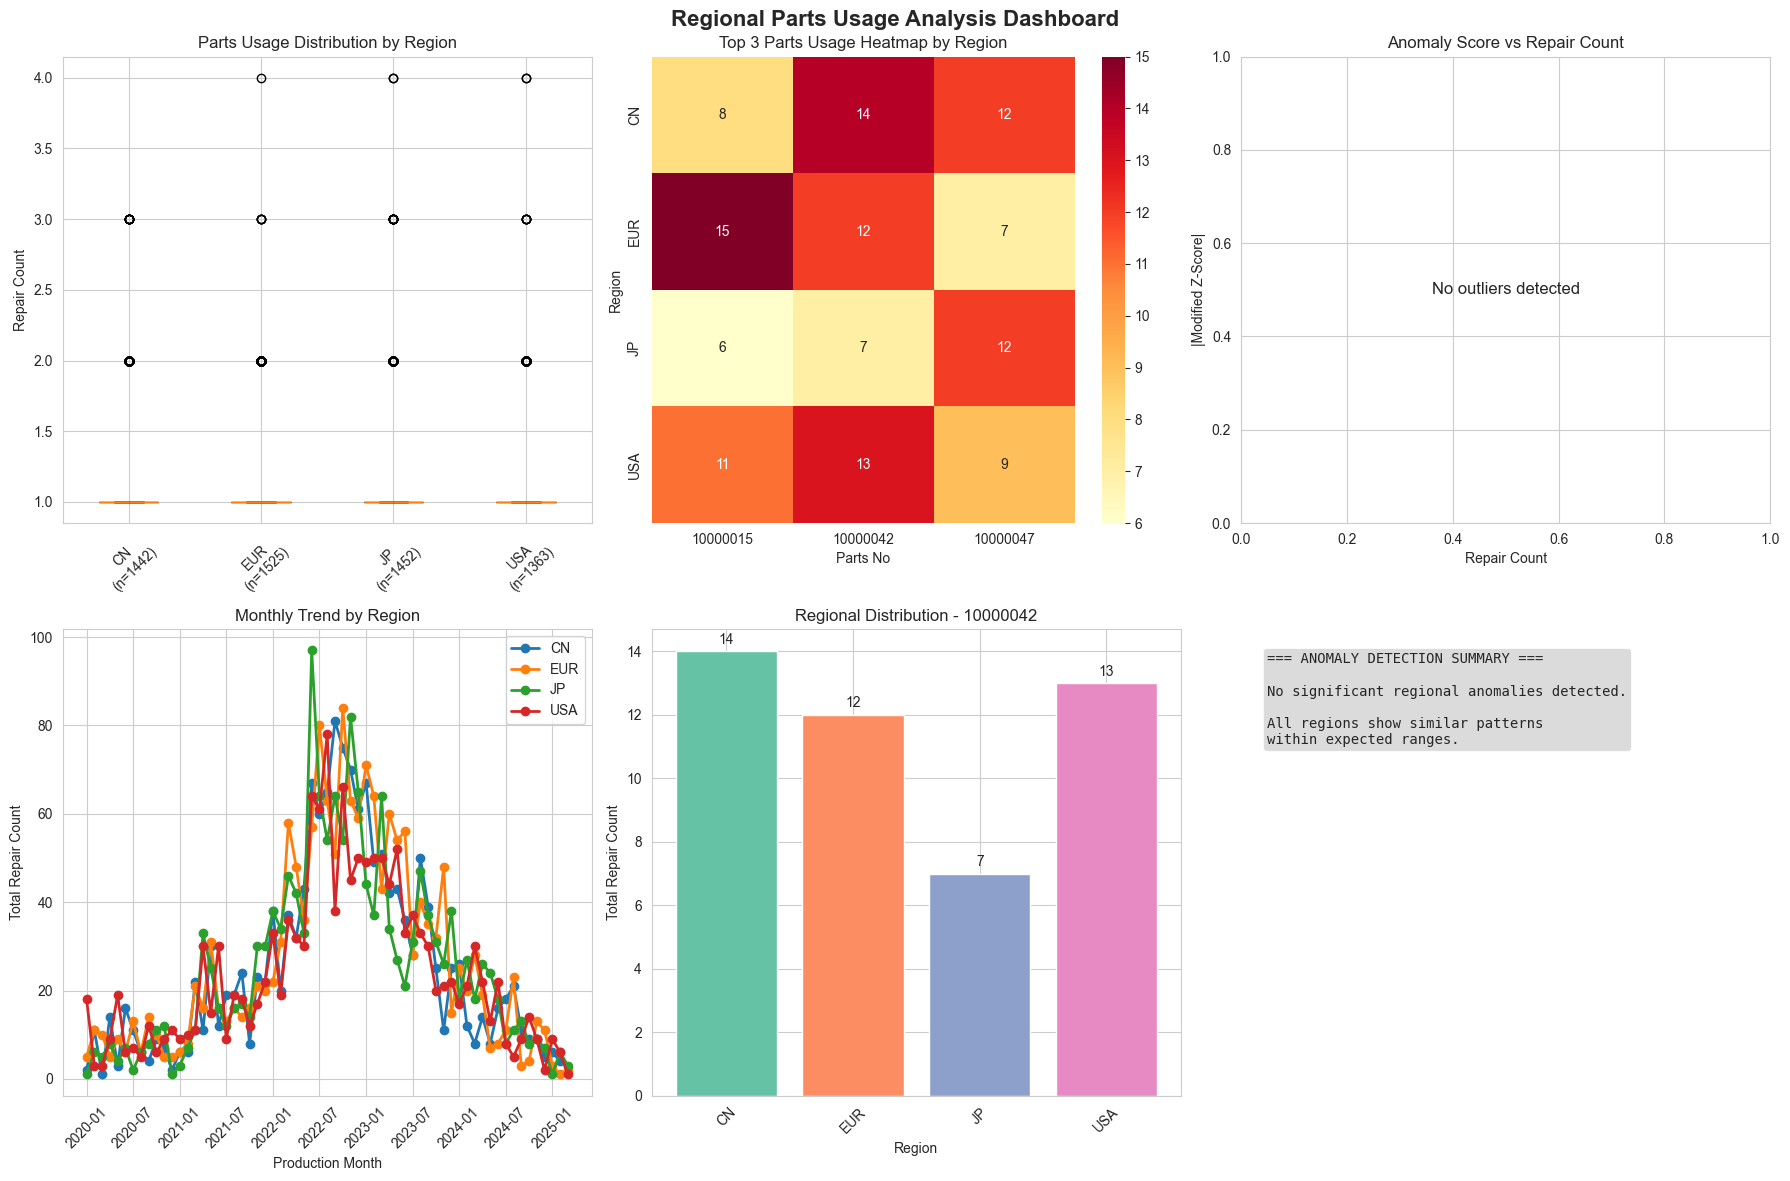

No outliers detected.

=== REGIONAL STATISTICS ===
      Total_Records  Total_Repairs  Mean_Repairs  Std_Repairs  Median_Repairs  \
Area                                                                            
CN             1442           1570          1.09         0.31             1.0   
EUR            1525           1673          1.10         0.31             1.0   
JP             1452           1592          1.10         0.33             1.0   
USA            1363           1491          1.09         0.32             1.0   

      Outlier_Count  
Area                 
CN                0  
EUR               0  
JP                0  
USA               0  

=== USAGE WITH YOUR DATA ===
# ÂÆüÈöõ„ÅÆ„Éá„Éº„Çø„Åß‰ΩøÁî®„Åô„ÇãÂ†¥Âêà:
detector = RegionalAnomalyDetector(df_parts)
outliers = detector.detect_regional_outliers(threshold=3.0)
fig = detector.create_regional_comparison_plots()
detector.create_detailed_outlier_report()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

# Êó•Êú¨Ë™û„Éï„Ç©„É≥„ÉàË®≠ÂÆö
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

class RegionalAnomalyDetector:
    """Âú∞ÂüüÂ∑Æ„Å´„Çà„ÇãÁï∞Â∏∏Ê§úÁü•„Å®ÂèØË¶ñÂåñ„ÇØ„É©„Çπ"""
    
    def __init__(self, df):
        self.df = df.copy()
        self.prepare_data()
    
    def prepare_data(self):
        """„Éá„Éº„Çø„ÅÆÂâçÂá¶ÁêÜ"""
        # prod_month„Ååperiod[M]Âûã„Åß„ÅÇ„Çã„Åì„Å®„ÇíÁ¢∫Ë™ç„ÉªÂ§âÊèõ
        if not isinstance(self.df['prod_month'].dtype, pd.PeriodDtype):
            print("Converting prod_month to period[M] type...")
            self.df['prod_month'] = pd.to_datetime(self.df['prod_month']).dt.to_period('M')
        
        # ÈÉ®ÂìÅ‰ΩøÁî®Êï∞„ÅÆÈõÜË®àÔºàÂú∞ÂüüÊØîËºÉÁî®ÔºöÊ©üÁ®Æ„ÉªË£ΩÈÄ†Âπ¥Êúà„ÇíÂõ∫ÂÆöÔºâ
        self.parts_usage = self.df.groupby(['Model', 'prod_month', 'Area', 'parts_no']).agg({
            'IF_ID': 'nunique'  # ‰øÆÁêÜÊï∞
        }).reset_index()
        self.parts_usage.rename(columns={'IF_ID': 'repair_count'}, inplace=True)
        
        # ÊôÇÁ≥ªÂàó„ÇΩ„Éº„ÉàÁî®„Å´ÊúüÈñì„Çí‰øùÊåÅ
        self.parts_usage['prod_month_str'] = self.parts_usage['prod_month'].astype(str)
        self.parts_usage = self.parts_usage.sort_values(['Model', 'prod_month', 'Area', 'parts_no'])
        
        print(f"„Éá„Éº„ÇøÊ¶ÇË¶Å:")
        print(f"- Ê©üÁ®ÆÊï∞: {self.parts_usage['Model'].nunique()}")
        print(f"- Âú∞ÂüüÊï∞: {self.parts_usage['Area'].nunique()}")
        print(f"- ÈÉ®ÂìÅÁ®ÆÈ°ûÊï∞: {self.parts_usage['parts_no'].nunique()}")
        print(f"- Ë£ΩÈÄ†Âπ¥ÊúàÊï∞: {self.parts_usage['prod_month'].nunique()}")
        print(f"- Ë£ΩÈÄ†Âπ¥ÊúàÁØÑÂõ≤: {self.parts_usage['prod_month'].min()} ~ {self.parts_usage['prod_month'].max()}")
    
    def detect_regional_outliers(self, threshold=3.0):
        """Âú∞ÂüüÈñì„Åß„ÅÆÁï∞Â∏∏Ê§úÁü•Ôºà‰øÆÊ≠£Z-Score‰ΩøÁî®Ôºâ"""
        
        def modified_z_score(data):
            """‰øÆÊ≠£Z-ScoreË®àÁÆó"""
            median = np.median(data)
            mad = np.median(np.abs(data - median))
            if mad == 0:
                return np.zeros(len(data))
            return 0.6745 * (data - median) / mad
        
        outliers = []
        
        # Ê©üÁ®Æ„ÉªË£ΩÈÄ†Âπ¥Êúà„ÉªÈÉ®ÂìÅ„Åî„Å®„Å´Âú∞ÂüüÈñìÊØîËºÉ
        for (model, prod_month, parts), group in self.parts_usage.groupby(['Model', 'prod_month', 'parts_no']):
            if len(group) < 3:  # Âú∞ÂüüÊï∞„ÅåÂ∞ë„Å™„ÅÑÂ†¥Âêà„ÅØ„Çπ„Ç≠„ÉÉ„Éó
                continue
            
            # ‰øÆÊ≠£Z-ScoreË®àÁÆó
            mod_z_scores = modified_z_score(group['repair_count'].values)
            
            # Áï∞Â∏∏Ê§úÁü•
            outlier_mask = np.abs(mod_z_scores) > threshold
            
            if outlier_mask.any():
                group_outliers = group[outlier_mask].copy()
                group_outliers['modified_z_score'] = mod_z_scores[outlier_mask]
                group_outliers['median_count'] = np.median(group['repair_count'])
                group_outliers['expected_range'] = f"{np.percentile(group['repair_count'], 25):.1f} - {np.percentile(group['repair_count'], 75):.1f}"
                
                outliers.append(group_outliers)
        
        if outliers:
            self.outliers = pd.concat(outliers, ignore_index=True)
            self.outliers['severity'] = pd.cut(
                np.abs(self.outliers['modified_z_score']), 
                bins=[0, 3, 5, float('inf')], 
                labels=['‰∏≠', 'È´ò', 'ÈáçÂ§ß']
            )
        else:
            self.outliers = pd.DataFrame()
        
        return self.outliers
    
    def create_regional_comparison_plots(self, top_n_parts=5):
        """Âú∞ÂüüÊØîËºÉ„ÅÆÂèØË¶ñÂåñÔºàË§áÊï∞„Ç∞„É©„ÉïÔºâ"""
        
        # Áï∞Â∏∏„ÅåÂ§ö„ÅÑÈÉ®ÂìÅTOP N „ÇíÂèñÂæó
        if len(self.outliers) > 0:
            top_parts = self.outliers['parts_no'].value_counts().head(top_n_parts).index.tolist()
        else:
            # Áï∞Â∏∏„Åå„Å™„ÅÑÂ†¥Âêà„ÅØ‰ΩøÁî®Êï∞„ÅåÂ§ö„ÅÑÈÉ®ÂìÅ„ÇíÈÅ∏Êäû
            top_parts = self.parts_usage.groupby('parts_no')['repair_count'].sum().nlargest(top_n_parts).index.tolist()
        
        # „Çµ„Éñ„Éó„É≠„ÉÉ„Éà„ÅÆË®≠ÂÆö
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Regional Parts Usage Analysis Dashboard', fontsize=16, fontweight='bold')
        
        # 1. Âú∞ÂüüÂà•ÈÉ®ÂìÅ‰ΩøÁî®Êï∞„ÅÆÁÆ±„Å≤„ÅíÂõ≥
        ax1 = axes[0, 0]
        plot_data = []
        plot_labels = []
        for area in self.parts_usage['Area'].unique():
            area_data = self.parts_usage[self.parts_usage['Area'] == area]['repair_count']
            plot_data.append(area_data)
            plot_labels.append(f"{area}\n(n={len(area_data)})")
        
        bp1 = ax1.boxplot(plot_data, labels=plot_labels, patch_artist=True)
        ax1.set_title('Parts Usage Distribution by Region')
        ax1.set_ylabel('Repair Count')
        ax1.tick_params(axis='x', rotation=45)
        
        # „Ç´„É©„Éº„É™„É≥„Ç∞
        colors = plt.cm.Set3(np.linspace(0, 1, len(bp1['boxes'])))
        for patch, color in zip(bp1['boxes'], colors):
            patch.set_facecolor(color)
        
        # 2. TOPÈÉ®ÂìÅ„ÅÆÂú∞ÂüüÂà•„Éí„Éº„Éà„Éû„ÉÉ„Éó
        ax2 = axes[0, 1]
        heatmap_data = self.parts_usage[self.parts_usage['parts_no'].isin(top_parts[:3])].groupby(['Area', 'parts_no'])['repair_count'].sum().unstack(fill_value=0)
        sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', ax=ax2)
        ax2.set_title('Top 3 Parts Usage Heatmap by Region')
        ax2.set_xlabel('Parts No')
        ax2.set_ylabel('Region')
        
        # 3. Áï∞Â∏∏Â∫¶„Çπ„Ç≥„Ç¢Êï£Â∏ÉÂõ≥
        ax3 = axes[0, 2]
        if len(self.outliers) > 0:
            scatter_colors = {'‰∏≠': 'orange', 'È´ò': 'red', 'ÈáçÂ§ß': 'darkred'}
            for severity in self.outliers['severity'].unique():
                subset = self.outliers[self.outliers['severity'] == severity]
                ax3.scatter(subset['repair_count'], np.abs(subset['modified_z_score']), 
                           c=scatter_colors[severity], label=f'Severity: {severity}', 
                           alpha=0.7, s=60)
            ax3.axhline(y=3, color='orange', linestyle='--', alpha=0.7, label='Threshold')
            ax3.legend()
        else:
            ax3.text(0.5, 0.5, 'No outliers detected', ha='center', va='center', transform=ax3.transAxes, fontsize=12)
        
        ax3.set_title('Anomaly Score vs Repair Count')
        ax3.set_xlabel('Repair Count')
        ax3.set_ylabel('|Modified Z-Score|')
        
        # 4. Âú∞ÂüüÂà•ÊôÇÁ≥ªÂàó„Éà„É¨„É≥„ÉâÔºàÊúàÂà•Ôºâ
        ax4 = axes[1, 0]
        monthly_trend = self.parts_usage.groupby(['prod_month', 'Area'])['repair_count'].sum().reset_index()
        
        # period[M]Âûã„ÅÆÊôÇÁ≥ªÂàó„Éá„Éº„Çø„ÇíÈÅ©Âàá„Å´„ÇΩ„Éº„Éà
        monthly_trend = monthly_trend.sort_values('prod_month')
        
        for area in monthly_trend['Area'].unique():
            area_data = monthly_trend[monthly_trend['Area'] == area].sort_values('prod_month')
            # PeriodÂûã„Çí„Éó„É≠„ÉÉ„ÉàÁî®„Å´Â§âÊèõ
            x_values = [str(period) for period in area_data['prod_month']]
            ax4.plot(range(len(x_values)), area_data['repair_count'], 
                    marker='o', label=area, linewidth=2)
        
        # XËª∏„ÅÆ„É©„Éô„É´„ÇíË®≠ÂÆöÔºàÈÅ©Â∫¶„Å´ÈñìÂºï„ÅèÔºâ
        unique_months = sorted(monthly_trend['prod_month'].unique())
        x_labels = [str(month) for month in unique_months]
        step = max(1, len(x_labels) // 10)  # ÊúÄÂ§ß10ÂÄãÁ®ãÂ∫¶„Å´ÈñìÂºï„Åè
        ax4.set_xticks(range(0, len(x_labels), step))
        ax4.set_xticklabels([x_labels[i] for i in range(0, len(x_labels), step)])
        
        ax4.set_title('Monthly Trend by Region')
        ax4.set_xlabel('Production Month')
        ax4.set_ylabel('Total Repair Count')
        ax4.legend()
        ax4.tick_params(axis='x', rotation=45)
        
        # 5. ÈÉ®ÂìÅÂà•Âú∞ÂüüÂàÜÂ∏É
        ax5 = axes[1, 1]
        if len(top_parts) > 0:
            part_regional = self.parts_usage[self.parts_usage['parts_no'] == top_parts[0]].groupby('Area')['repair_count'].sum()
            bars = ax5.bar(part_regional.index, part_regional.values, color=plt.cm.Set2(np.arange(len(part_regional))))
            ax5.set_title(f'Regional Distribution - {top_parts[0]}')
            ax5.set_xlabel('Region')
            ax5.set_ylabel('Total Repair Count')
            ax5.tick_params(axis='x', rotation=45)
            
            # ÂÄ§„Çí„Éê„Éº„ÅÆ‰∏ä„Å´Ë°®Á§∫
            for bar, value in zip(bars, part_regional.values):
                ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(part_regional.values),
                        f'{value}', ha='center', va='bottom')
        
        # 6. Áï∞Â∏∏Ê§úÁü•„Çµ„Éû„É™„Éº
        ax6 = axes[1, 2]
        ax6.axis('off')
        
        # „Çµ„Éû„É™„ÉºÊÉÖÂ†±‰ΩúÊàê
        summary_text = "=== ANOMALY DETECTION SUMMARY ===\n\n"
        
        if len(self.outliers) > 0:
            summary_text += f"Total Outliers Detected: {len(self.outliers)}\n\n"
            
            severity_counts = self.outliers['severity'].value_counts()
            for severity, count in severity_counts.items():
                summary_text += f"‚Ä¢ {severity} severity: {count} cases\n"
            
            summary_text += f"\nTop Problematic Parts:\n"
            top_problem_parts = self.outliers['parts_no'].value_counts().head(3)
            for part, count in top_problem_parts.items():
                summary_text += f"‚Ä¢ {part}: {count} outliers\n"
            
            summary_text += f"\nTop Problematic Regions:\n"
            top_problem_areas = self.outliers['Area'].value_counts().head(3)
            for area, count in top_problem_areas.items():
                summary_text += f"‚Ä¢ {area}: {count} outliers\n"
        else:
            summary_text += "No significant regional anomalies detected.\n\n"
            summary_text += "All regions show similar patterns\nwithin expected ranges."
        
        ax6.text(0.05, 0.95, summary_text, transform=ax6.transAxes, fontsize=10,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
        
        plt.tight_layout()
        return fig
    
    def create_detailed_outlier_report(self):
        """Ë©≥Á¥∞„Å™Áï∞Â∏∏„É¨„Éù„Éº„Éà„ÅÆ‰ΩúÊàê"""
        if len(self.outliers) == 0:
            print("No outliers detected.")
            return None
        
        print("=== DETAILED REGIONAL ANOMALY REPORT ===\n")
        
        # ÈáçË¶ÅÂ∫¶Âà•„Å´„ÇΩ„Éº„Éà
        severity_order = {'ÈáçÂ§ß': 3, 'È´ò': 2, '‰∏≠': 1}
        self.outliers['severity_num'] = self.outliers['severity'].map(severity_order)
        sorted_outliers = self.outliers.sort_values(['severity_num', 'modified_z_score'], ascending=[False, False])
        
        for i, (_, row) in enumerate(sorted_outliers.head(10).iterrows(), 1):
            print(f"{i}. [{row['severity']}] Model: {row['Model']}, Region: {row['Area']}")
            print(f"   Parts: {row['parts_no']}, Production: {row['prod_month']}")
            print(f"   Actual: {row['repair_count']}, Expected range: {row['expected_range']}")
            print(f"   Z-Score: {row['modified_z_score']:.2f}")
            print("-" * 60)
        
        return sorted_outliers
    
    def get_regional_statistics(self):
        """Âú∞ÂüüÂà•Áµ±Ë®à„Çµ„Éû„É™„Éº"""
        regional_stats = self.parts_usage.groupby('Area').agg({
            'repair_count': ['count', 'sum', 'mean', 'std', 'median']
        }).round(2)
        
        regional_stats.columns = ['Total_Records', 'Total_Repairs', 'Mean_Repairs', 'Std_Repairs', 'Median_Repairs']
        
        # Áï∞Â∏∏Ê§úÁü•Êï∞„ÇÇËøΩÂä†
        if len(self.outliers) > 0:
            outlier_counts = self.outliers['Area'].value_counts()
            regional_stats['Outlier_Count'] = regional_stats.index.map(outlier_counts).fillna(0).astype(int)
        else:
            regional_stats['Outlier_Count'] = 0
        
        return regional_stats

# ‰ΩøÁî®‰æã„Å®„ÉÜ„Çπ„ÉàÁî®„ÅÆ„Çµ„É≥„Éó„É´„Éá„Éº„ÇøÁîüÊàê
def generate_sample_data(n_records=1000):
    """„ÉÜ„Çπ„ÉàÁî®„Çµ„É≥„Éó„É´„Éá„Éº„ÇøÁîüÊàê"""
    np.random.seed(42)
    
    models = ['Camera_A', 'Camera_B', 'Camera_C']
    areas = ['Tokyo', 'Osaka', 'Nagoya', 'Fukuoka', 'Sendai']
    parts = [f'P{i:03d}' for i in range(1, 21)]
    # period[M]Âûã„ÅßË£ΩÈÄ†Âπ¥Êúà„ÇíÁîüÊàê
    months = pd.period_range('2023-01', '2024-12', freq='M')
    
    data = []
    for _ in range(n_records):
        # Âú∞Âüü„Å´„Çà„ÇãÁï∞Â∏∏„ÇíÊÑèÂõ≥ÁöÑ„Å´‰ΩúÊàê
        area = np.random.choice(areas)
        model = np.random.choice(models)
        part = np.random.choice(parts)
        month = np.random.choice(months)
        
        # Osaka„ÅßÁâπÂÆöÈÉ®ÂìÅP001„ÅÆÁï∞Â∏∏„Çí‰ΩúÊàê
        base_prob = 0.1
        if area == 'Osaka' and part == 'P001':
            base_prob = 0.4  # Áï∞Â∏∏„Å´È´ò„ÅÑÁ¢∫Áéá
        elif area == 'Fukuoka' and part in ['P002', 'P003']:
            base_prob = 0.3  # „ÇÑ„ÇÑÈ´ò„ÅÑÁ¢∫Áéá
        
        if np.random.random() < base_prob:
            data.append({
                'date': pd.Timestamp('2024-01-01') + pd.Timedelta(days=np.random.randint(0, 365)),
                'prod_month': month,  # period[M]Âûã
                'Model': model,
                'Area': area,
                'parts_no': part,
                'IF_ID': f'R{len(data):06d}'
            })
    
    df = pd.DataFrame(data)
    # prod_month„Ååperiod[M]Âûã„Åß„ÅÇ„Çã„Åì„Å®„ÇíÁ¢∫Ë™ç
    df['prod_month'] = df['prod_month'].astype('period[M]')
    return df

# ÂÆüË°å‰æã
if __name__ == "__main__":
    print("=== Regional Anomaly Detection System ===\n")
    
    # „Çµ„É≥„Éó„É´„Éá„Éº„Çø„ÅßÂÆüË°åÔºàÂÆüÈöõ„ÅÆ„Éá„Éº„Çø„Å´ÁΩÆ„ÅçÊèõ„Åà„Å¶„Åè„Å†„Åï„ÅÑÔºâ
    #df_sample = generate_sample_data(1500)
    df_sample = repair_df.copy()
    print(f"Sample data generated: {len(df_sample)} records\n")
    
    # Âú∞ÂüüÁï∞Â∏∏Ê§úÁü•„Ç∑„Çπ„ÉÜ„É†„ÅÆÂàùÊúüÂåñ
    detector = RegionalAnomalyDetector(df_sample)
    
    # Áï∞Â∏∏Ê§úÁü•ÂÆüË°å
    outliers = detector.detect_regional_outliers(threshold=2.5)
    print(f"Outliers detected: {len(outliers)}\n")
    
    # ÂèØË¶ñÂåñÂÆüË°å
    fig = detector.create_regional_comparison_plots()
    plt.show()
    
    # Ë©≥Á¥∞„É¨„Éù„Éº„Éà
    detailed_report = detector.create_detailed_outlier_report()
    
    # Âú∞ÂüüÂà•Áµ±Ë®à
    print("\n=== REGIONAL STATISTICS ===")
    regional_stats = detector.get_regional_statistics()
    print(regional_stats)
    
    print("\n=== USAGE WITH YOUR DATA ===")
    print("# ÂÆüÈöõ„ÅÆ„Éá„Éº„Çø„Åß‰ΩøÁî®„Åô„ÇãÂ†¥Âêà:")
    print("detector = RegionalAnomalyDetector(df_parts)")
    print("outliers = detector.detect_regional_outliers(threshold=3.0)")
    print("fig = detector.create_regional_comparison_plots()")
    print("detector.create_detailed_outlier_report()")

# Ë£ΩÈÄ†Âπ¥ÊúàÂ∑Æ

Ë£ΩÈÄ†ÂìÅË≥™Áï∞Â∏∏Ê§úÁü•„ÇíÈñãÂßã„Åó„Åæ„Åô...
„Éá„Éº„ÇøÈõÜË®à‰∏≠...
ÈõÜË®àÂÆå‰∫Ü: 5782„É¨„Ç≥„Éº„Éâ
Áï∞Â∏∏Ê§úÁü•ÂÆå‰∫Ü: 1‰ª∂„ÅÆÁï∞Â∏∏„ÇíÊ§úÂá∫


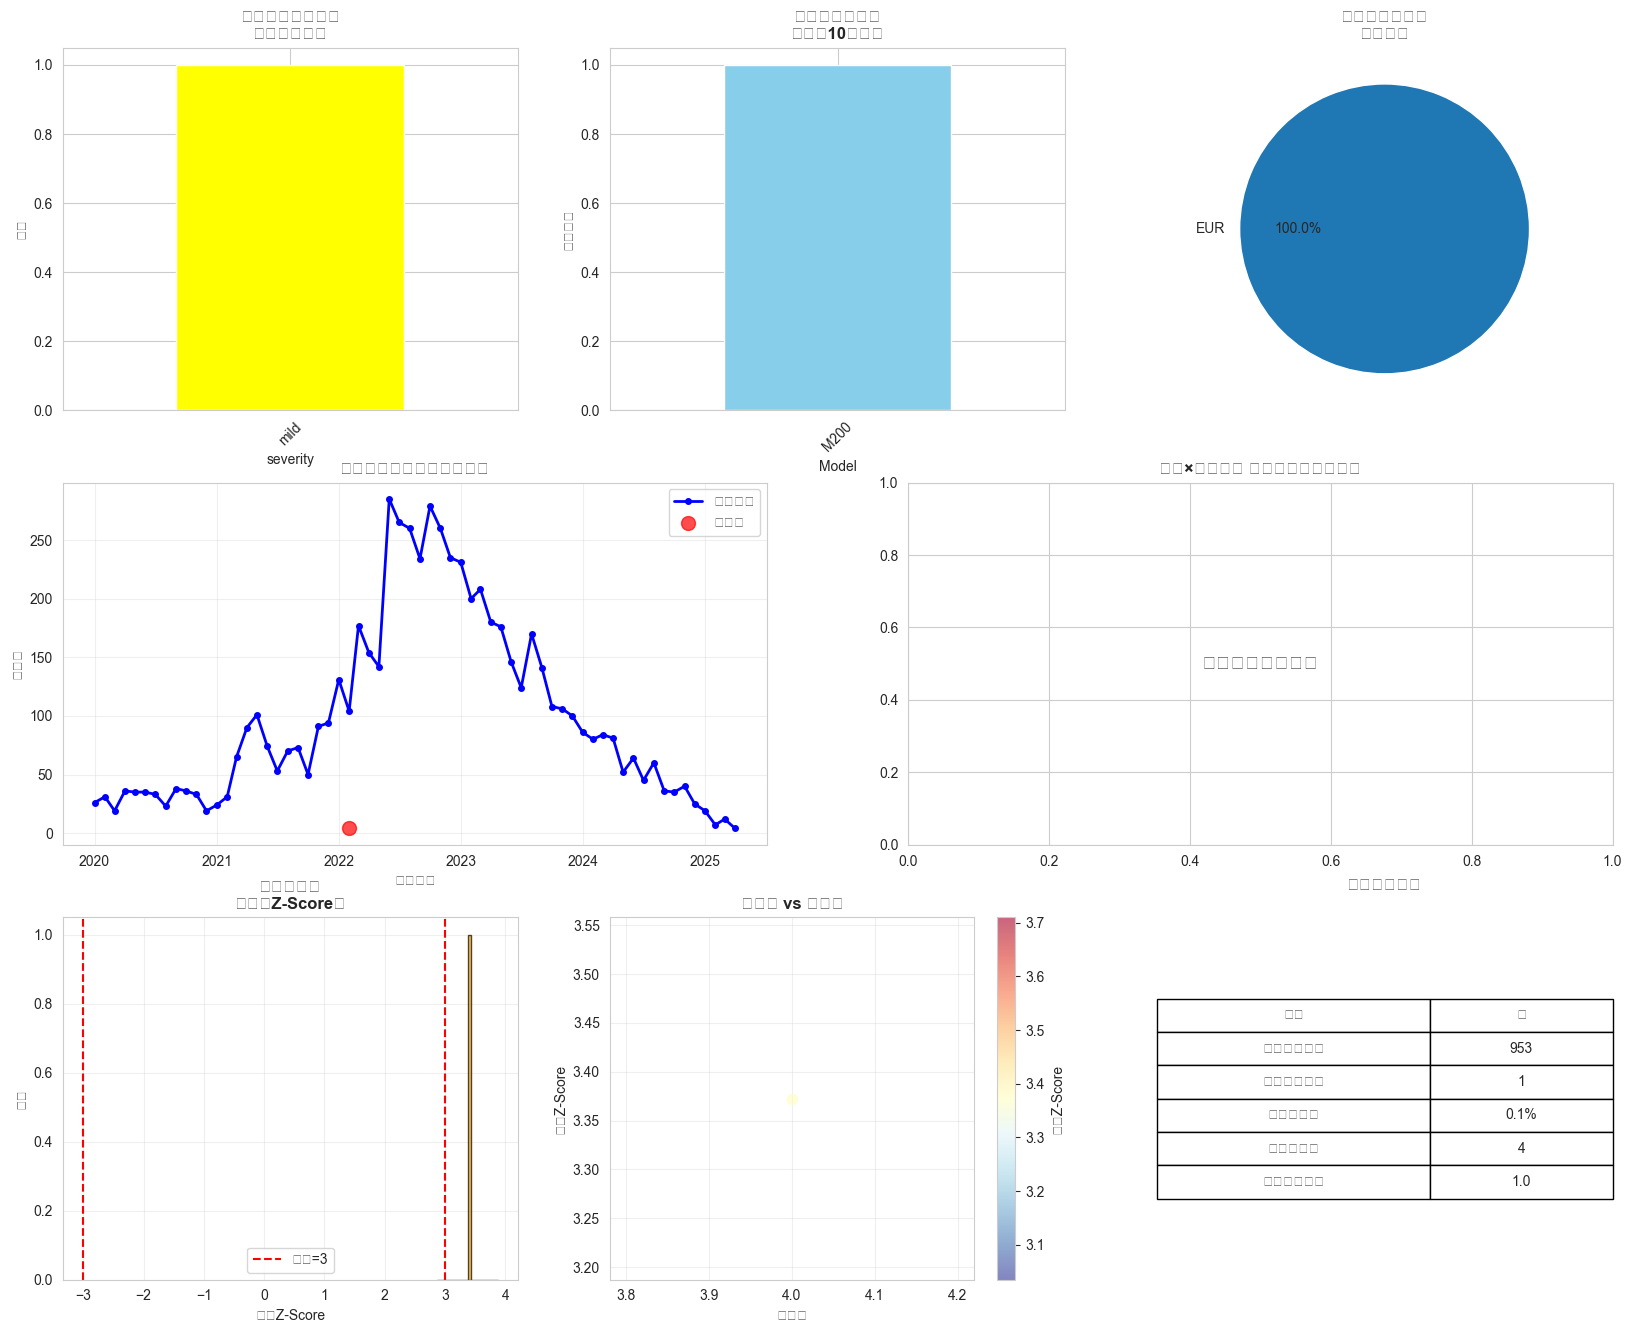

Ë£ΩÈÄ†ÂìÅË≥™ Áï∞Â∏∏Ê§úÁü•„É¨„Éù„Éº„Éà

Ê§úÂá∫‰ª∂Êï∞: 1‰ª∂
ÈáçË¶ÅÂ∫¶Âà•ÂÜÖË®≥:
  critical: 0‰ª∂
  moderate: 0‰ª∂
  mild: 1‰ª∂

‰∏ä‰Ωç10‰ª∂„ÅÆË©≥Á¥∞:
------------------------------------------------------------

[1] MILD - ‰øÆÊ≠£Z-Score: 3.37
    Ê©üÁ®Æ: M200
    Âú∞Âüü: EUR
    Ë£ΩÈÄ†Âπ¥Êúà: 2022-02
    ÈÉ®ÂìÅÁï™Âè∑: 20000050
    ‰øÆÁêÜÊï∞: 4‰ª∂ (‰∏≠Â§ÆÂÄ§: 1.5‰ª∂)
    Áï∞Â∏∏„Çø„Ç§„Éó: ÈÄöÂ∏∏„Çà„ÇäÂ§ö„ÅÑ


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Êó•Êú¨Ë™û„Éï„Ç©„É≥„ÉàË®≠ÂÆöÔºàÂøÖË¶Å„Å´Âøú„Åò„Å¶Ôºâ
#plt.rcParams['font.family'] = 'DejaVu Sans'
# Êó•Êú¨Ë™û„Éï„Ç©„É≥„ÉàË®≠ÂÆö
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style("whitegrid")
def detect_manufacturing_quality_outliers(df, threshold=3.0):
    """
    Ë£ΩÈÄ†ÂìÅË≥™Áï∞Â∏∏Ê§úÁü•Ôºàperiod[M]ÂØæÂøúÔºâ
    
    Parameters:
    -----------
    df : pandas.DataFrame
        ‰øÆÁêÜ„Éá„Éº„Çø
    threshold : float
        Áï∞Â∏∏Ê§úÁü•„ÅÆÈñæÂÄ§Ôºà‰øÆÊ≠£Z-ScoreÔºâ
    
    Returns:
    --------
    outliers_df : pandas.DataFrame
        Ê§úÂá∫„Åï„Çå„ÅüÁï∞Â∏∏„Éá„Éº„Çø
    summary_stats : pandas.DataFrame
        Áµ±Ë®à„Çµ„Éû„É™„Éº
    """
    
    # 1. Ë£ΩÈÄ†Âπ¥ÊúàÂà•„ÉªÊ©üÁ®ÆÂà•„ÉªÂú∞ÂüüÂà•„ÉªÈÉ®ÂìÅÂà•„ÅÆ‰øÆÁêÜÊï∞„ÇíÈõÜË®à
    print("„Éá„Éº„ÇøÈõÜË®à‰∏≠...")
    
    # period[M]„ÇíÊñáÂ≠óÂàó„Å´Â§âÊèõÔºàÂá¶ÁêÜ„Åó„ÇÑ„Åô„Åè„Åô„Çã„Åü„ÇÅÔºâ
    df_work = df.copy()
    df_work['prod_month_str'] = df_work['prod_month'].astype(str)
    
    # ‰øÆÁêÜÊï∞„ÇíÈõÜË®àÔºàIF_ID„Çí„É¶„Éã„Éº„ÇØ„Ç´„Ç¶„É≥„ÉàÔºâ
    repair_counts = df_work.groupby([
        'Model', 'Area', 'prod_month_str', 'parts_no'
    ]).agg({
        'IF_ID': 'nunique'  # ‰øÆÁêÜÊï∞
    }).reset_index()
    repair_counts.rename(columns={'IF_ID': 'repair_count'}, inplace=True)
    
    print(f"ÈõÜË®àÂÆå‰∫Ü: {len(repair_counts)}„É¨„Ç≥„Éº„Éâ")
    
    # 2. ÂêÑÈÉ®ÂìÅ„Å´„Å§„ÅÑ„Å¶„ÄÅË£ΩÈÄ†Âπ¥Êúà„Å´„Çà„ÇãÁï∞Â∏∏„ÇíÊ§úÁü•
    def modified_z_score(data):
        """‰øÆÊ≠£Z-ScoreË®àÁÆó"""
        median = np.median(data)
        mad = np.median(np.abs(data - median))
        if mad == 0:
            return np.zeros(len(data))
        return 0.6745 * (data - median) / mad
    
    outliers_list = []
    summary_stats_list = []
    
    # Ê©üÁ®Æ√óÂú∞Âüü√óÈÉ®ÂìÅ„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åî„Å®„Å´Áï∞Â∏∏Ê§úÁü•
    for (model, area, parts), group in repair_counts.groupby(['Model', 'Area', 'parts_no']):
        
        if len(group) < 3:  # „Éá„Éº„ÇøÁÇπ„ÅåÂ∞ë„Å™„ÅÑÂ†¥Âêà„ÅØ„Çπ„Ç≠„ÉÉ„Éó
            continue
        
        # ‰øÆÊ≠£Z-ScoreË®àÁÆó
        mod_z_scores = modified_z_score(group['repair_count'].values)
        
        # Áµ±Ë®à„Çµ„Éû„É™„Éº
        summary_stats_list.append({
            'Model': model,
            'Area': area,
            'parts_no': parts,
            'data_points': len(group),
            'median_repair_count': np.median(group['repair_count']),
            'mad': np.median(np.abs(group['repair_count'] - np.median(group['repair_count']))),
            'min_repair_count': group['repair_count'].min(),
            'max_repair_count': group['repair_count'].max(),
            'total_repairs': group['repair_count'].sum()
        })
        
        # Áï∞Â∏∏ÂÄ§Ê§úÂá∫
        outlier_mask = np.abs(mod_z_scores) > threshold
        
        if outlier_mask.any():
            outliers = group[outlier_mask].copy()
            outliers['modified_z_score'] = mod_z_scores[outlier_mask]
            outliers['median_repair_count'] = np.median(group['repair_count'])
            outliers['outlier_type'] = ['high' if z > 0 else 'low' for z in mod_z_scores[outlier_mask]]
            outliers['severity'] = ['critical' if abs(z) > 5 else 'moderate' if abs(z) > 4 else 'mild' 
                                  for z in mod_z_scores[outlier_mask]]
            
            outliers_list.append(outliers)
    
    # ÁµêÊûú„ÇíDataFrame„Å´Áµ±Âêà
    outliers_df = pd.concat(outliers_list, ignore_index=True) if outliers_list else pd.DataFrame()
    summary_stats = pd.DataFrame(summary_stats_list)
    
    print(f"Áï∞Â∏∏Ê§úÁü•ÂÆå‰∫Ü: {len(outliers_df)}‰ª∂„ÅÆÁï∞Â∏∏„ÇíÊ§úÂá∫")
    
    return outliers_df, summary_stats

def visualize_manufacturing_quality(df, outliers_df, summary_stats, save_path=None):
    """
    Ë£ΩÈÄ†ÂìÅË≥™„ÅÆÂèØË¶ñÂåñ
    
    Parameters:
    -----------
    df : pandas.DataFrame
        ÂÖÉ„ÅÆ‰øÆÁêÜ„Éá„Éº„Çø
    outliers_df : pandas.DataFrame
        Áï∞Â∏∏Ê§úÁü•ÁµêÊûú
    summary_stats : pandas.DataFrame
        Áµ±Ë®à„Çµ„Éû„É™„Éº
    save_path : str, optional
        ‰øùÂ≠ò„Éë„Çπ
    """
    
    # „Éá„Éº„ÇøÊ∫ñÂÇô
    df_work = df.copy()
    df_work['prod_month_str'] = df_work['prod_month'].astype(str)
    
    # ‰øÆÁêÜÊï∞ÈõÜË®à
    repair_counts = df_work.groupby([
        'Model', 'Area', 'prod_month_str', 'parts_no'
    ]).agg({'IF_ID': 'nunique'}).reset_index()
    repair_counts.rename(columns={'IF_ID': 'repair_count'}, inplace=True)
    
    # Ë£ΩÈÄ†Âπ¥Êúà„ÇíÊó•‰ªòÂûã„Å´Â§âÊèõÔºà„ÇΩ„Éº„ÉàÁî®Ôºâ
    repair_counts['prod_month_date'] = pd.to_datetime(repair_counts['prod_month_str'] + '-01')
    repair_counts = repair_counts.sort_values('prod_month_date')
    
    # Âõ≥„ÅÆ„Çµ„Ç§„Ç∫Ë®≠ÂÆö
    fig = plt.figure(figsize=(20, 16))
    
    # 1. Áï∞Â∏∏Ê§úÁü•„Çµ„Éû„É™„ÉºÔºàÂ∑¶‰∏äÔºâ
    ax1 = plt.subplot(3, 3, 1)
    if not outliers_df.empty:
        severity_counts = outliers_df['severity'].value_counts()
        colors = {'critical': 'red', 'moderate': 'orange', 'mild': 'yellow'}
        severity_counts.plot(kind='bar', ax=ax1, 
                           color=[colors.get(x, 'gray') for x in severity_counts.index])
        ax1.set_title('Áï∞Â∏∏Ê§úÁü•„Çµ„Éû„É™„Éº\nÔºàÈáçË¶ÅÂ∫¶Âà•Ôºâ', fontsize=12, fontweight='bold')
        ax1.set_ylabel('‰ª∂Êï∞')
        ax1.tick_params(axis='x', rotation=45)
    else:
        ax1.text(0.5, 0.5, 'Áï∞Â∏∏„Å™„Åó', ha='center', va='center', fontsize=14)
        ax1.set_title('Áï∞Â∏∏Ê§úÁü•„Çµ„Éû„É™„Éº', fontsize=12, fontweight='bold')
    
    # 2. Ê©üÁ®ÆÂà•Áï∞Â∏∏‰ª∂Êï∞ÔºàÂè≥‰∏äÔºâ
    ax2 = plt.subplot(3, 3, 2)
    if not outliers_df.empty:
        model_counts = outliers_df['Model'].value_counts().head(10)
        model_counts.plot(kind='bar', ax=ax2, color='skyblue')
        ax2.set_title('Ê©üÁ®ÆÂà•Áï∞Â∏∏‰ª∂Êï∞\nÔºà‰∏ä‰Ωç10Ê©üÁ®ÆÔºâ', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Áï∞Â∏∏‰ª∂Êï∞')
        ax2.tick_params(axis='x', rotation=45)
    else:
        ax2.text(0.5, 0.5, 'Áï∞Â∏∏„Å™„Åó', ha='center', va='center', fontsize=14)
        ax2.set_title('Ê©üÁ®ÆÂà•Áï∞Â∏∏‰ª∂Êï∞', fontsize=12, fontweight='bold')
    
    # 3. Âú∞ÂüüÂà•Áï∞Â∏∏‰ª∂Êï∞Ôºà‰∏≠Â§Æ‰∏äÔºâ
    ax3 = plt.subplot(3, 3, 3)
    if not outliers_df.empty:
        area_counts = outliers_df['Area'].value_counts()
        area_counts.plot(kind='pie', ax=ax3, autopct='%1.1f%%')
        ax3.set_title('Âú∞ÂüüÂà•Áï∞Â∏∏‰ª∂Êï∞\nÔºàÂâ≤ÂêàÔºâ', fontsize=12, fontweight='bold')
        ax3.set_ylabel('')
    else:
        ax3.text(0.5, 0.5, 'Áï∞Â∏∏„Å™„Åó', ha='center', va='center', fontsize=14)
        ax3.set_title('Âú∞ÂüüÂà•Áï∞Â∏∏‰ª∂Êï∞', fontsize=12, fontweight='bold')
    
    # 4. ÊôÇÁ≥ªÂàó„Éà„É¨„É≥„ÉâÔºàÂ∑¶‰∏ã„ÄÅÂ§ß„Åç„ÅèÔºâ
    ax4 = plt.subplot(3, 2, 3)
    
    # ÊúàÂà•„ÅÆ‰øÆÁêÜÊï∞„Éà„É¨„É≥„Éâ
    monthly_repairs = repair_counts.groupby('prod_month_date')['repair_count'].agg(['sum', 'count']).reset_index()
    
    ax4.plot(monthly_repairs['prod_month_date'], monthly_repairs['sum'], 
             marker='o', linewidth=2, markersize=4, color='blue', label='Á∑è‰øÆÁêÜÊï∞')
    
    # Áï∞Â∏∏ÁÇπ„Çí„Éû„Éº„ÇØ
    if not outliers_df.empty:
        outliers_monthly = outliers_df.copy()
        outliers_monthly['prod_month_date'] = pd.to_datetime(outliers_monthly['prod_month_str'] + '-01')
        outlier_monthly_sum = outliers_monthly.groupby('prod_month_date')['repair_count'].sum().reset_index()
        
        ax4.scatter(outlier_monthly_sum['prod_month_date'], outlier_monthly_sum['repair_count'], 
                   color='red', s=100, alpha=0.7, label='Áï∞Â∏∏Êúà', zorder=5)
    
    ax4.set_title('Ë£ΩÈÄ†Âπ¥ÊúàÂà•‰øÆÁêÜÊï∞„Éà„É¨„É≥„Éâ', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Ë£ΩÈÄ†Âπ¥Êúà')
    ax4.set_ylabel('‰øÆÁêÜÊï∞')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. ÈÉ®ÂìÅÂà•Áï∞Â∏∏„Éí„Éº„Éà„Éû„ÉÉ„ÉóÔºàÂè≥‰∏ãÔºâ
    ax5 = plt.subplot(3, 2, 4)
    
    if not outliers_df.empty and len(outliers_df) > 1:
        # ÈÉ®ÂìÅ√óË£ΩÈÄ†Âπ¥Êúà„ÅÆ„Éí„Éº„Éà„Éû„ÉÉ„Éó
        heatmap_data = outliers_df.pivot_table(
            values='modified_z_score', 
            index='parts_no', 
            columns='prod_month_str', 
            aggfunc='mean'
        )
        
        # „Éá„Éº„Çø„ÅåÂ§ö„Åô„Åé„ÇãÂ†¥Âêà„ÅØ‰∏ä‰Ωç„ÇíË°®Á§∫
        if len(heatmap_data) > 15:
            top_parts = outliers_df['parts_no'].value_counts().head(15).index
            heatmap_data = heatmap_data.loc[top_parts]
        
        sns.heatmap(heatmap_data, ax=ax5, cmap='RdYlBu_r', center=0, 
                   cbar_kws={'label': '‰øÆÊ≠£Z-Score'}, annot=True, fmt='.1f')
        ax5.set_title('ÈÉ®ÂìÅ√óË£ΩÈÄ†Âπ¥Êúà Áï∞Â∏∏Â∫¶„Éí„Éº„Éà„Éû„ÉÉ„Éó', fontsize=12, fontweight='bold')
        ax5.set_xlabel('Ë£ΩÈÄ†Âπ¥Êúà')
        ax5.set_ylabel('ÈÉ®ÂìÅÁï™Âè∑')
    else:
        ax5.text(0.5, 0.5, 'ÂçÅÂàÜ„Å™„Éá„Éº„Çø„Å™„Åó', ha='center', va='center', fontsize=14)
        ax5.set_title('ÈÉ®ÂìÅ√óË£ΩÈÄ†Âπ¥Êúà Áï∞Â∏∏Â∫¶„Éí„Éº„Éà„Éû„ÉÉ„Éó', fontsize=12, fontweight='bold')
    
    # 6. Áï∞Â∏∏Â∫¶ÂàÜÂ∏ÉÔºàÂ∑¶‰∏ã‰∏ãÔºâ
    ax6 = plt.subplot(3, 3, 7)
    if not outliers_df.empty:
        ax6.hist(outliers_df['modified_z_score'], bins=20, alpha=0.7, color='orange', edgecolor='black')
        ax6.axvline(x=3, color='red', linestyle='--', label='ÈñæÂÄ§=3')
        ax6.axvline(x=-3, color='red', linestyle='--')
        ax6.set_title('Áï∞Â∏∏Â∫¶ÂàÜÂ∏É\nÔºà‰øÆÊ≠£Z-ScoreÔºâ', fontsize=12, fontweight='bold')
        ax6.set_xlabel('‰øÆÊ≠£Z-Score')
        ax6.set_ylabel('È†ªÂ∫¶')
        ax6.legend()
        ax6.grid(True, alpha=0.3)
    else:
        ax6.text(0.5, 0.5, 'Áï∞Â∏∏„Å™„Åó', ha='center', va='center', fontsize=14)
        ax6.set_title('Áï∞Â∏∏Â∫¶ÂàÜÂ∏É', fontsize=12, fontweight='bold')
    
    # 7. ‰øÆÁêÜÊï∞vsÁï∞Â∏∏Â∫¶Êï£Â∏ÉÂõ≥Ôºà‰∏≠Â§Æ‰∏ãÔºâ
    ax7 = plt.subplot(3, 3, 8)
    if not outliers_df.empty:
        scatter = ax7.scatter(outliers_df['repair_count'], outliers_df['modified_z_score'], 
                            c=outliers_df['modified_z_score'], cmap='RdYlBu_r', 
                            alpha=0.6, s=50)
        ax7.set_title('‰øÆÁêÜÊï∞ vs Áï∞Â∏∏Â∫¶', fontsize=12, fontweight='bold')
        ax7.set_xlabel('‰øÆÁêÜÊï∞')
        ax7.set_ylabel('‰øÆÊ≠£Z-Score')
        ax7.grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=ax7, label='‰øÆÊ≠£Z-Score')
    else:
        ax7.text(0.5, 0.5, 'Áï∞Â∏∏„Å™„Åó', ha='center', va='center', fontsize=14)
        ax7.set_title('‰øÆÁêÜÊï∞ vs Áï∞Â∏∏Â∫¶', fontsize=12, fontweight='bold')
    
    # 8. Áµ±Ë®à„Çµ„Éû„É™„ÉºË°®ÔºàÂè≥‰∏ã‰∏ãÔºâ
    ax8 = plt.subplot(3, 3, 9)
    ax8.axis('off')
    
    # Áµ±Ë®à„Çµ„Éû„É™„Éº„ÉÜ„Éº„Éñ„É´
    if not summary_stats.empty:
        stats_summary = pd.DataFrame({
            'È†ÖÁõÆ': ['Á∑è„Éá„Éº„ÇøÁÇπÊï∞', 'Áï∞Â∏∏Ê§úÁü•‰ª∂Êï∞', 'Áï∞Â∏∏Ê§úÁü•Áéá', 'ÊúÄÂ§ß‰øÆÁêÜÊï∞', '‰∏≠Â§ÆÂÄ§‰øÆÁêÜÊï∞'],
            'ÂÄ§': [
                f"{len(summary_stats):,}",
                f"{len(outliers_df):,}",
                f"{len(outliers_df)/len(summary_stats)*100:.1f}%" if len(summary_stats) > 0 else "0%",
                f"{summary_stats['max_repair_count'].max():,}" if not summary_stats.empty else "0",
                f"{summary_stats['median_repair_count'].median():.1f}" if not summary_stats.empty else "0"
            ]
        })
        
        table = ax8.table(cellText=stats_summary.values, colLabels=stats_summary.columns,
                         cellLoc='center', loc='center', colWidths=[0.6, 0.4])
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 2)
        ax8.set_title('Áµ±Ë®à„Çµ„Éû„É™„Éº', fontsize=12, fontweight='bold', pad=20)
    else:
        ax8.text(0.5, 0.5, '„Éá„Éº„Çø„Å™„Åó', ha='center', va='center', fontsize=14)
        ax8.set_title('Áµ±Ë®à„Çµ„Éû„É™„Éº', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Âõ≥„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü: {save_path}")
    
    plt.show()

def print_detailed_outliers(outliers_df, top_n=10):
    """
    Ë©≥Á¥∞„Å™Áï∞Â∏∏„É¨„Éù„Éº„ÉàÂá∫Âäõ
    """
    if outliers_df.empty:
        print("Áï∞Â∏∏„ÅØÊ§úÂá∫„Åï„Çå„Åæ„Åõ„Çì„Åß„Åó„Åü„ÄÇ")
        return
    
    print("=" * 60)
    print("Ë£ΩÈÄ†ÂìÅË≥™ Áï∞Â∏∏Ê§úÁü•„É¨„Éù„Éº„Éà")
    print("=" * 60)
    
    # ÈáçË¶ÅÂ∫¶È†Ü„Å´„ÇΩ„Éº„Éà
    severity_order = {'critical': 3, 'moderate': 2, 'mild': 1}
    outliers_sorted = outliers_df.copy()
    outliers_sorted['severity_rank'] = outliers_sorted['severity'].map(severity_order)
    outliers_sorted = outliers_sorted.sort_values(['severity_rank', 'modified_z_score'], ascending=[False, False])
    
    print(f"\nÊ§úÂá∫‰ª∂Êï∞: {len(outliers_df)}‰ª∂")
    print(f"ÈáçË¶ÅÂ∫¶Âà•ÂÜÖË®≥:")
    for severity in ['critical', 'moderate', 'mild']:
        count = len(outliers_df[outliers_df['severity'] == severity])
        print(f"  {severity}: {count}‰ª∂")
    
    print(f"\n‰∏ä‰Ωç{top_n}‰ª∂„ÅÆË©≥Á¥∞:")
    print("-" * 60)
    
    for i, (_, row) in enumerate(outliers_sorted.head(top_n).iterrows()):
        print(f"\n[{i+1}] {row['severity'].upper()} - ‰øÆÊ≠£Z-Score: {row['modified_z_score']:.2f}")
        print(f"    Ê©üÁ®Æ: {row['Model']}")
        print(f"    Âú∞Âüü: {row['Area']}")
        print(f"    Ë£ΩÈÄ†Âπ¥Êúà: {row['prod_month_str']}")
        print(f"    ÈÉ®ÂìÅÁï™Âè∑: {row['parts_no']}")
        print(f"    ‰øÆÁêÜÊï∞: {row['repair_count']}‰ª∂ (‰∏≠Â§ÆÂÄ§: {row['median_repair_count']:.1f}‰ª∂)")
        print(f"    Áï∞Â∏∏„Çø„Ç§„Éó: {'ÈÄöÂ∏∏„Çà„ÇäÂ§ö„ÅÑ' if row['outlier_type'] == 'high' else 'ÈÄöÂ∏∏„Çà„ÇäÂ∞ë„Å™„ÅÑ'}")

# ‰ΩøÁî®‰æã
def run_manufacturing_quality_analysis(df_parts):
    """
    Ë£ΩÈÄ†ÂìÅË≥™Ëß£Êûê„ÅÆÂÆüË°å
    """
    print("Ë£ΩÈÄ†ÂìÅË≥™Áï∞Â∏∏Ê§úÁü•„ÇíÈñãÂßã„Åó„Åæ„Åô...")
    
    # Áï∞Â∏∏Ê§úÁü•ÂÆüË°å
    outliers_df, summary_stats = detect_manufacturing_quality_outliers(df_parts, threshold=3.0)
    
    # ÁµêÊûú„ÅÆÂèØË¶ñÂåñ
    visualize_manufacturing_quality(df_parts, outliers_df, summary_stats)
    
    # Ë©≥Á¥∞„É¨„Éù„Éº„ÉàÂá∫Âäõ
    print_detailed_outliers(outliers_df, top_n=10)
    
    return outliers_df, summary_stats

# ÂÆüË°åÊñπÊ≥ï:
df_parts = repair_df.copy()
outliers, stats = run_manufacturing_quality_analysis(df_parts)

# Ë£ΩÈÄ†Âπ¥Êúà„Å®Âú∞Âüü„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ
**ÂìÅË≥™‰øùË®ºÊãÖÂΩìËÄÖÔºàQAÔºâ**: Ë£ΩÈÄ†Âπ¥Êúà„Å®Âú∞Âüü„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åß„ÅÆÁï∞Â∏∏Ê§úÁü•„Åß„Åô„Å≠ÔºÅ„Åì„Çå„ÅØÈùûÂ∏∏„Å´ÂÆüÁî®ÁöÑ„Å™Ë¶ñÁÇπ„Åß„Åô„ÄÇÁâπÂÆö„ÅÆË£ΩÈÄ†„É≠„ÉÉ„Éà„ÅåÁâπÂÆöÂú∞Âüü„ÅßÈõÜ‰∏≠ÁöÑ„Å´ÂïèÈ°å„ÇíËµ∑„Åì„Åó„Å¶„ÅÑ„Çã„Ç±„Éº„Çπ„ÇíÊ§úÂá∫„Åß„Åç„Åæ„Åô„ÄÇ

**„Éá„Éº„Çø„Çµ„Ç§„Ç®„É≥„ÉÜ„Ç£„Çπ„ÉàÔºàDSÔºâ**: Áµ±Ë®àÁöÑ„Å´„ÅØ„Äå‰∫åÊ¨°ÂÖÉÁöÑ„Å™Áï∞Â∏∏Ê§úÁü•„Äç„Å´„Å™„Çä„Åæ„Åô„ÄÇÂçò‰∏ÄËª∏„Åß„ÅÆÊØîËºÉ„Å®„ÅØÁï∞„Å™„Çä„ÄÅË§áÊï∞„ÅÆ„Ç¢„Éó„É≠„Éº„ÉÅ„ÅåËÄÉ„Åà„Çâ„Çå„Åæ„Åô„ÄÇ

## 1. „Ç¢„Éó„É≠„Éº„ÉÅ„ÅÆÂàÜÈ°û

### A. Áõ¥Êé•ÊØîËºÉÊñπÂºè
**QA**: Ë£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Çí‰∏Ä„Å§„ÅÆÂçò‰Ωç„Å®„Åó„Å¶Êâ±„ÅÜÊñπÊ≥ï„Åß„Åô„ÄÇ

```python
# group_cols „Å´Ê©üÁ®Æ„Å®ÈÉ®ÂìÅ„ÅÆ„Åø„ÇíÂê´„ÇÅ„Çã
group_cols = ['Model', 'parts_no']  
# ‚Üí prod_month √ó Area „ÅÆÁµÑ„ÅøÂêà„Çè„ÅõÈñì„ÅßÊØîËºÉ
```

### B. ÈöéÂ±§ÊØîËºÉÊñπÂºè  
**DS**: ÊÆµÈöéÁöÑ„Å´ÊØîËºÉ„Åô„ÇãÊñπÊ≥ï„Åß„Åô„ÄÇ

### C. Áõ∏‰∫í‰ΩúÁî®Ê§úÂá∫ÊñπÂºè
**QA**: Ë£ΩÈÄ†Âπ¥Êúà„Å®Âú∞Âüü„ÅÆÁõ∏‰∫í‰ΩúÁî®„Å´„Çà„ÇãÁï∞Â∏∏„ÇíÊ§úÂá∫„Åô„ÇãÊñπÊ≥ï„Åß„Åô„ÄÇ

## 2. ÂÖ∑‰ΩìÁöÑ„Å™ÂÆüË£ÖÊñπÊ≥ï**DS**: 4„Å§„ÅÆÁï∞„Å™„Çã„Ç¢„Éó„É≠„Éº„ÉÅ„ÇíÂÆüË£Ö„Åó„Åæ„Åó„Åü„ÄÇ„Åù„Çå„Åû„Çå„ÅÆÁâπÂæ¥„ÇíË™¨Êòé„Åó„Åæ„ÅôÔºö

## ÂêÑÊâãÊ≥ï„ÅÆÁâπÂæ¥„Å®‰Ωø„ÅÑÂàÜ„Åë

### ÊñπÊ≥ï1: Áõ¥Êé•ÁµÑ„ÅøÂêà„Çè„ÅõÁï∞Â∏∏Ê§úÁü•
**QA**: ÊúÄ„ÇÇ„Ç∑„É≥„Éó„É´„ÅßÁêÜËß£„Åó„ÇÑ„Åô„ÅÑÊñπÊ≥ï„Åß„Åô„ÄÇ
- **ÈÅ©Áî®Â†¥Èù¢**: Ë£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü„ÅÆÁâπÂÆö„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åå‰ªñ„Å®Â§ß„Åç„ÅèÁï∞„Å™„ÇãÂ†¥Âêà
- **Ê§úÂá∫ÂÜÖÂÆπ**: „Äå2023-10Êúà√óÊù±‰∫¨„Äç„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„ÅåÁï∞Â∏∏„Å´Â§ö„ÅÑ/Â∞ë„Å™„ÅÑ
- **Âà©ÁÇπ**: Ëß£Èáà„ÅåÂÆπÊòì„ÄÅË®àÁÆó„ÅåÈ´òÈÄü
- **Ê¨†ÁÇπ**: ÁµÑ„ÅøÂêà„Çè„Åõ„ÅåÂ§ö„ÅÑ„Å®„Éá„Éº„Çø„ÅåÂàÜÊï£„Åó„Åå„Å°

```python
# ‰ΩøÁî®‰æã
outliers_direct = method_1_direct_combination_outliers(df_parts, threshold=3.0)
```

### ÊñπÊ≥ï2: ÈöéÂ±§ÁöÑÁï∞Â∏∏Ê§úÁü•
**DS**: ÊÆµÈöéÁöÑ„Å´Áï∞Â∏∏„ÇíÁµû„ÇäËæº„ÇÄÊñπÊ≥ï„Åß„Åô„ÄÇ
- **ÈÅ©Áî®Â†¥Èù¢**: „Çà„ÇäÁ¢∫ÂÆü„Å™Áï∞Â∏∏„ÇíÊ§úÂá∫„Åó„Åü„ÅÑÂ†¥Âêà
- **Ê§úÂá∫ÂÜÖÂÆπ**: Ë£ΩÈÄ†Âπ¥Êúà„Åß„ÇÇÂú∞Âüü„Åß„ÇÇ‰∏°ÊñπÁï∞Â∏∏„Å™ÁµÑ„ÅøÂêà„Çè„Åõ
- **Âà©ÁÇπ**: False Positive„ÅåÂ∞ë„Å™„ÅÑ„ÄÅÊ†πÊã†„ÅåÂº∑„ÅÑ
- **Ê¨†ÁÇπ**: Ê§úÂá∫‰ª∂Êï∞„ÅåÂ∞ë„Å™„Åè„Å™„Çä„Åå„Å°

### ÊñπÊ≥ï3: Áõ∏‰∫í‰ΩúÁî®Áï∞Â∏∏Ê§úÁü•
**QA**: Áµ±Ë®àÂ≠¶ÁöÑ„Å´ÊúÄ„ÇÇÁêÜË´ñÁöÑ„Å™ÊñπÊ≥ï„Åß„Åô„ÄÇ
- **ÈÅ©Áî®Â†¥Èù¢**: Ë£ΩÈÄ†Âπ¥Êúà„Å®Âú∞Âüü„ÅÆÁõ∏‰∫í‰æùÂ≠òÈñ¢‰øÇ„Å´Áï∞Â∏∏„Åå„ÅÇ„ÇãÂ†¥Âêà
- **Ê§úÂá∫ÂÜÖÂÆπ**: Áã¨Á´ãÊÄß„Åã„ÇâÊúüÂæÖ„Åï„Çå„ÇãÂÄ§„Å®Â§ß„Åç„ÅèÁï∞„Å™„ÇãÁµÑ„ÅøÂêà„Çè„Åõ
- **Âà©ÁÇπ**: Áµ±Ë®àÁöÑÊ†πÊã†„ÅåÊòéÁ¢∫
- **Ê¨†ÁÇπ**: Ëß£Èáà„Åå„ÇÑ„ÇÑË§áÈõë

### ÊñπÊ≥ï4: „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞„Éô„Éº„ÇπÁï∞Â∏∏Ê§úÁü•
**DS**: Ê©üÊ¢∞Â≠¶ÁøíÁöÑ„Å™„Ç¢„Éó„É≠„Éº„ÉÅ„Åß„Åô„ÄÇ
- **ÈÅ©Áî®Â†¥Èù¢**: Ë§áÈõë„Å™„Éë„Çø„Éº„É≥„ÅÆÁï∞Â∏∏„ÇíÊ§úÂá∫„Åó„Åü„ÅÑÂ†¥Âêà
- **Ê§úÂá∫ÂÜÖÂÆπ**: 3Ê¨°ÂÖÉÁ©∫ÈñìÔºàË£ΩÈÄ†Âπ¥Êúà„ÄÅÂú∞Âüü„ÄÅ‰øÆÁêÜÊï∞Ôºâ„Åß„ÅÆÂ§ñ„ÇåÂÄ§
- **Âà©ÁÇπ**: Ë§áÈõë„Å™Áï∞Â∏∏„Éë„Çø„Éº„É≥„ÇíÊ§úÂá∫ÂèØËÉΩ
- **Ê¨†ÁÇπ**: „Éñ„É©„ÉÉ„ÇØ„Éú„ÉÉ„ÇØ„ÇπÁöÑ„ÄÅ„Éë„É©„É°„Éº„ÇøË™øÊï¥„ÅåÂøÖË¶Å

## ÂÆüÁî®ÁöÑ„Å™‰Ωø„ÅÑÊñπ„ÅÆÊé®Â•®È†ÜÂ∫è

**QA**: ÂÆüÈöõ„ÅÆÂìÅË≥™‰øùË®ºÊ•≠Âãô„Åß„ÅØ„ÄÅ‰ª•‰∏ã„ÅÆÈ†ÜÂ∫è„Åß‰Ωø„ÅÜ„Åì„Å®„Çí„ÅäÂãß„ÇÅ„Åó„Åæ„ÅôÔºö

### Phase 1: ÂàùÊúü„Çπ„ÇØ„É™„Éº„Éã„É≥„Ç∞
```python
# „Åæ„ÅöÊñπÊ≥ï1„ÅßÂ§ß„Åæ„Åã„Å™Áï∞Â∏∏„ÇíÊääÊè°
outliers_direct = method_1_direct_combination_outliers(df_parts, threshold=3.0)
```

### Phase 2: Á¢∫ÂÆü„Å™Áï∞Â∏∏„ÅÆÁâπÂÆö
```python
# ÊñπÊ≥ï2„ÅßÁ¢∫ÂÆüÊÄß„ÅÆÈ´ò„ÅÑÁï∞Â∏∏„ÇíÁâπÂÆö
outliers_hier, month_out, area_out = method_2_hierarchical_outliers(df_parts, threshold=3.0)
```

### Phase 3: Ë©≥Á¥∞ÂàÜÊûê
```python
# ÊñπÊ≥ï3„ÅßÁµ±Ë®àÁöÑË©≥Á¥∞ÂàÜÊûê
outliers_interaction = method_3_interaction_detection(df_parts, threshold=3.0)
```

### Phase 4: È´òÂ∫¶„Å™ÂàÜÊûêÔºàÂøÖË¶Å„Å´Âøú„Åò„Å¶Ôºâ
```python
# ÊñπÊ≥ï4„ÅßË§áÈõë„Éë„Çø„Éº„É≥„ÅÆÊ§úÂá∫
outliers_clustering = method_4_clustering_based_outliers(df_parts)
```

## „Éë„É©„É°„Éº„ÇøË™øÊï¥„ÅÆ„Ç¨„Ç§„Éâ

**DS**: ÂêÑÊâãÊ≥ï„ÅÆ„Éë„É©„É°„Éº„ÇøË™øÊï¥„Å´„Å§„ÅÑ„Å¶Ôºö

### ÈñæÂÄ§„ÅÆË™øÊï¥
- **threshold=2.5**: Âé≥„Åó„ÅÑÂü∫Ê∫ñÔºàÊ§úÂá∫Êï∞Â§ö„ÄÅFalse PositiveÂ§öÔºâ  
- **threshold=3.0**: Ê®ôÊ∫ñÁöÑÔºà„Éê„É©„É≥„ÇπÔºâ
- **threshold=3.5**: Á∑©„ÅÑÂü∫Ê∫ñÔºàÊ§úÂá∫Êï∞Â∞ë„ÄÅÁ¢∫ÂÆüÊÄßÈ´òÔºâ

### „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞„Éë„É©„É°„Éº„Çø
- **eps**: Â∞è„Åï„ÅÑ„Åª„Å©Âé≥„Åó„ÅÑÔºà0.3-0.8„ÇíÊé®Â•®Ôºâ
- **min_samples**: Â§ß„Åç„ÅÑ„Åª„Å©Á¢∫ÂÆüÔºà3-5„ÇíÊé®Â•®Ôºâ

**QA**: ÂÆüÈöõ„Å´„Å©„ÅÆÊâãÊ≥ï„Åã„ÇâË©¶„Åó„Å¶„Åø„Åü„ÅÑ„Åß„Åô„ÅãÔºü„Åæ„Åü„ÄÅÁâπÂÆö„ÅÆË£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„ÅßÊ∞ó„Å´„Å™„Çã„Ç±„Éº„Çπ„Åå„ÅÇ„Çå„Å∞„ÄÅ„Åù„Çå„ÇíÈáçÁÇπÁöÑ„Å´ÂàÜÊûê„Åô„Çã„Åì„Å®„ÇÇ„Åß„Åç„Åæ„Åô„ÄÇ

Ë£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü ÁµÑ„ÅøÂêà„Çè„ÅõÁï∞Â∏∏Ê§úÁü•„ÇíÈñãÂßã„Åó„Åæ„Åô...

=== ÊñπÊ≥ï1: Áõ¥Êé•ÁµÑ„ÅøÂêà„Çè„ÅõÁï∞Â∏∏Ê§úÁü• ===
Ê§úÂá∫‰ª∂Êï∞: 0‰ª∂

=== ÊñπÊ≥ï2: ÈöéÂ±§ÁöÑÁï∞Â∏∏Ê§úÁü• ===
Ë£ΩÈÄ†Âπ¥ÊúàÁï∞Â∏∏: 1‰ª∂
Âú∞ÂüüÁï∞Â∏∏: 0‰ª∂
‰∏°ÊñπÁï∞Â∏∏Ôºà‰∫§ÈõÜÂêàÔºâ: 0‰ª∂

=== ÊñπÊ≥ï3: Áõ∏‰∫í‰ΩúÁî®Áï∞Â∏∏Ê§úÁü• ===
Ê§úÂá∫‰ª∂Êï∞: 32‰ª∂

=== ÊñπÊ≥ï4: „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞„Éô„Éº„ÇπÁï∞Â∏∏Ê§úÁü• ===
Ê§úÂá∫‰ª∂Êï∞: 3351‰ª∂



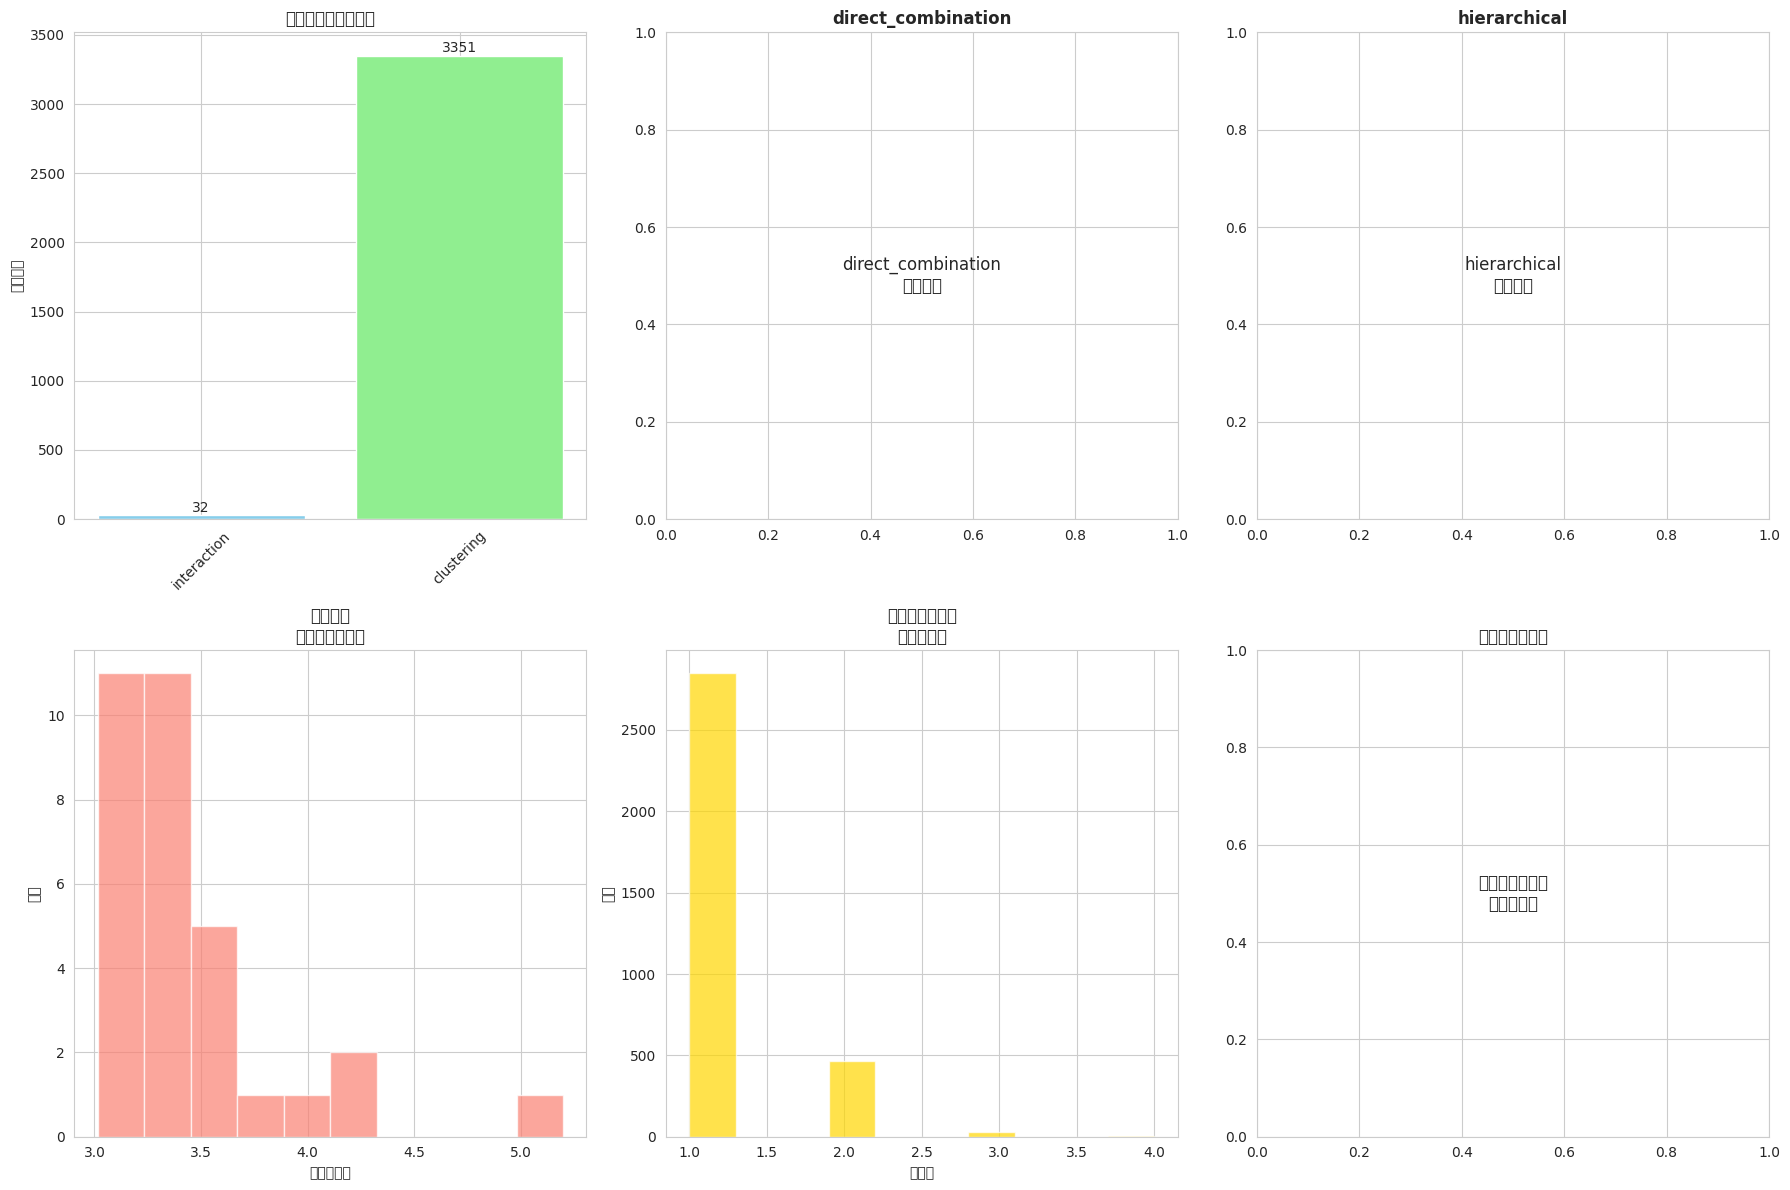

Ë£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü ÁµÑ„ÅøÂêà„Çè„ÅõÁï∞Â∏∏Ê§úÁü• ÁµêÊûú„Çµ„Éû„É™„Éº

direct_combination:
  Áï∞Â∏∏Ê§úÂá∫„Å™„Åó

hierarchical:
  Áï∞Â∏∏Ê§úÂá∫„Å™„Åó

interaction:
  Ê§úÂá∫‰ª∂Êï∞: 32‰ª∂
  ‰∏ä‰Ωç3‰ª∂:
    1. M100 - 10000001 - 2020-07 - USA
    2. M100 - 10000001 - 2022-01 - USA
    3. M100 - 10000022 - 2022-11 - JP

clustering:
  Ê§úÂá∫‰ª∂Êï∞: 3351‰ª∂
  ‰∏ä‰Ωç3‰ª∂:
    1. M100 - 10000001 - 2020-02 - EUR
    2. M100 - 10000001 - 2020-07 - USA
    3. M100 - 10000001 - 2020-10 - CN


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DejaVu Sans'

def method_1_direct_combination_outliers(df, threshold=3.0):
    """
    ÊñπÊ≥ï1: Áõ¥Êé•ÁµÑ„ÅøÂêà„Çè„ÅõÁï∞Â∏∏Ê§úÁü•
    Ë£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Çí‰∏Ä„Å§„ÅÆÂçò‰Ωç„Å®„Åó„Å¶Áï∞Â∏∏Ê§úÁü•
    """
    print("=== ÊñπÊ≥ï1: Áõ¥Êé•ÁµÑ„ÅøÂêà„Çè„ÅõÁï∞Â∏∏Ê§úÁü• ===")
    
    # „Éá„Éº„ÇøÊ∫ñÂÇô
    df_work = df.copy()
    df_work['prod_month_str'] = df_work['prod_month'].astype(str)
    
    # Ë£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü√óÊ©üÁ®Æ√óÈÉ®ÂìÅ„ÅßÈõÜË®à
    repair_counts = df_work.groupby([
        'Model', 'parts_no', 'prod_month_str', 'Area'
    ]).agg({'IF_ID': 'nunique'}).reset_index()
    repair_counts.rename(columns={'IF_ID': 'repair_count'}, inplace=True)
    
    # ÁµÑ„ÅøÂêà„Çè„ÅõÂàó„Çí‰ΩúÊàê
    repair_counts['prod_month_area'] = repair_counts['prod_month_str'] + '_' + repair_counts['Area']
    
    def modified_z_score(data):
        median = np.median(data)
        mad = np.median(np.abs(data - median))
        if mad == 0:
            return np.zeros(len(data))
        return 0.6745 * (data - median) / mad
    
    outliers_list = []
    
    # Ê©üÁ®Æ√óÈÉ®ÂìÅ„Åî„Å®„Å´„ÄÅË£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„ÅßÁï∞Â∏∏Ê§úÁü•
    for (model, parts), group in repair_counts.groupby(['Model', 'parts_no']):
        if len(group) < 3:
            continue
        
        mod_z_scores = modified_z_score(group['repair_count'].values)
        outlier_mask = np.abs(mod_z_scores) > threshold
        
        if outlier_mask.any():
            outliers = group[outlier_mask].copy()
            outliers['modified_z_score'] = mod_z_scores[outlier_mask]
            outliers['median_repair_count'] = np.median(group['repair_count'])
            outliers['method'] = 'direct_combination'
            outliers['outlier_type'] = ['high' if z > 0 else 'low' for z in mod_z_scores[outlier_mask]]
            outliers_list.append(outliers)
    
    result_df = pd.concat(outliers_list, ignore_index=True) if outliers_list else pd.DataFrame()
    print(f"Ê§úÂá∫‰ª∂Êï∞: {len(result_df)}‰ª∂")
    
    return result_df

def method_2_hierarchical_outliers(df, threshold=3.0):
    """
    ÊñπÊ≥ï2: ÈöéÂ±§ÁöÑÁï∞Â∏∏Ê§úÁü•
    1. Ë£ΩÈÄ†Âπ¥Êúà„ÅßÁï∞Â∏∏Ê§úÁü• ‚Üí 2. „Åù„ÅÆ‰∏≠„ÅßÂú∞ÂüüÂà•Áï∞Â∏∏Ê§úÁü•
    """
    print("=== ÊñπÊ≥ï2: ÈöéÂ±§ÁöÑÁï∞Â∏∏Ê§úÁü• ===")
    
    df_work = df.copy()
    df_work['prod_month_str'] = df_work['prod_month'].astype(str)
    
    # Step 1: Ë£ΩÈÄ†Âπ¥Êúà„Å´„Çà„ÇãÁï∞Â∏∏Ê§úÁü•
    repair_counts_month = df_work.groupby([
        'Model', 'Area', 'parts_no', 'prod_month_str'
    ]).agg({'IF_ID': 'nunique'}).reset_index()
    repair_counts_month.rename(columns={'IF_ID': 'repair_count'}, inplace=True)
    
    def modified_z_score(data):
        median = np.median(data)
        mad = np.median(np.abs(data - median))
        if mad == 0:
            return np.zeros(len(data))
        return 0.6745 * (data - median) / mad
    
    # Ë£ΩÈÄ†Âπ¥Êúà„Åß„ÅÆÁï∞Â∏∏„ÇíÊ§úÁü•
    month_outliers = []
    for (model, area, parts), group in repair_counts_month.groupby(['Model', 'Area', 'parts_no']):
        if len(group) < 3:
            continue
        
        mod_z_scores = modified_z_score(group['repair_count'].values)
        outlier_mask = np.abs(mod_z_scores) > threshold
        
        if outlier_mask.any():
            outliers = group[outlier_mask].copy()
            outliers['z_score_month'] = mod_z_scores[outlier_mask]
            month_outliers.append(outliers)
    
    month_outliers_df = pd.concat(month_outliers, ignore_index=True) if month_outliers else pd.DataFrame()
    
    # Step 2: Âú∞Âüü„Å´„Çà„ÇãÁï∞Â∏∏Ê§úÁü•
    repair_counts_area = df_work.groupby([
        'Model', 'prod_month_str', 'parts_no', 'Area'
    ]).agg({'IF_ID': 'nunique'}).reset_index()
    repair_counts_area.rename(columns={'IF_ID': 'repair_count'}, inplace=True)
    
    area_outliers = []
    for (model, month, parts), group in repair_counts_area.groupby(['Model', 'prod_month_str', 'parts_no']):
        if len(group) < 3:
            continue
        
        mod_z_scores = modified_z_score(group['repair_count'].values)
        outlier_mask = np.abs(mod_z_scores) > threshold
        
        if outlier_mask.any():
            outliers = group[outlier_mask].copy()
            outliers['z_score_area'] = mod_z_scores[outlier_mask]
            area_outliers.append(outliers)
    
    area_outliers_df = pd.concat(area_outliers, ignore_index=True) if area_outliers else pd.DataFrame()
    
    # Step 3: ‰∏°Êñπ„ÅßÁï∞Â∏∏„Å™„ÇÇ„ÅÆ„ÇíÁâπÂÆöÔºà‰∫§ÈõÜÂêàÔºâ
    if not month_outliers_df.empty and not area_outliers_df.empty:
        # ÂÖ±ÈÄö„ÅÆ„Ç≠„Éº„ÅßÁµêÂêà
        hierarchical_outliers = pd.merge(
            month_outliers_df[['Model', 'Area', 'parts_no', 'prod_month_str', 'repair_count', 'z_score_month']],
            area_outliers_df[['Model', 'Area', 'parts_no', 'prod_month_str', 'z_score_area']],
            on=['Model', 'Area', 'parts_no', 'prod_month_str'],
            how='inner'
        )
        hierarchical_outliers['method'] = 'hierarchical'
        hierarchical_outliers['combined_z_score'] = np.sqrt(
            hierarchical_outliers['z_score_month']**2 + hierarchical_outliers['z_score_area']**2
        )
    else:
        hierarchical_outliers = pd.DataFrame()
    
    print(f"Ë£ΩÈÄ†Âπ¥ÊúàÁï∞Â∏∏: {len(month_outliers_df)}‰ª∂")
    print(f"Âú∞ÂüüÁï∞Â∏∏: {len(area_outliers_df)}‰ª∂")  
    print(f"‰∏°ÊñπÁï∞Â∏∏Ôºà‰∫§ÈõÜÂêàÔºâ: {len(hierarchical_outliers)}‰ª∂")
    
    return hierarchical_outliers, month_outliers_df, area_outliers_df

def method_3_interaction_detection(df, threshold=3.0):
    """
    ÊñπÊ≥ï3: Áõ∏‰∫í‰ΩúÁî®Áï∞Â∏∏Ê§úÁü•
    Ë£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü„ÅÆÁõ∏‰∫í‰ΩúÁî®ÂäπÊûú„Å´„Çà„ÇãÁï∞Â∏∏„ÇíÊ§úÁü•
    """
    print("=== ÊñπÊ≥ï3: Áõ∏‰∫í‰ΩúÁî®Áï∞Â∏∏Ê§úÁü• ===")
    
    df_work = df.copy()
    df_work['prod_month_str'] = df_work['prod_month'].astype(str)
    
    # ‰øÆÁêÜÊï∞ÈõÜË®à
    repair_counts = df_work.groupby([
        'Model', 'parts_no', 'prod_month_str', 'Area'
    ]).agg({'IF_ID': 'nunique'}).reset_index()
    repair_counts.rename(columns={'IF_ID': 'repair_count'}, inplace=True)
    
    interaction_outliers = []
    
    for (model, parts), group in repair_counts.groupby(['Model', 'parts_no']):
        if len(group) < 6:  # ÊúÄ‰ΩéÈôê„ÅÆ„Éá„Éº„ÇøÊï∞
            continue
        
        # „Éî„Éú„ÉÉ„Éà„ÉÜ„Éº„Éñ„É´‰ΩúÊàêÔºàË£ΩÈÄ†Âπ¥Êúà √ó Âú∞ÂüüÔºâ
        pivot_table = group.pivot_table(
            values='repair_count', 
            index='prod_month_str', 
            columns='Area', 
            fill_value=0
        )
        
        if pivot_table.shape[0] < 2 or pivot_table.shape[1] < 2:
            continue
        
        # ÊúüÂæÖÂÄ§„ÅÆË®àÁÆóÔºàÁã¨Á´ãÊÄß„Çí‰ªÆÂÆöÔºâ
        row_totals = pivot_table.sum(axis=1)
        col_totals = pivot_table.sum(axis=0)
        grand_total = pivot_table.sum().sum()
        
        expected = np.outer(row_totals, col_totals) / grand_total
        expected_df = pd.DataFrame(expected, index=pivot_table.index, columns=pivot_table.columns)
        
        # ÊÆãÂ∑Æ„ÅÆË®àÁÆó
        residuals = pivot_table - expected_df
        
        # Ê®ôÊ∫ñÂåñÊÆãÂ∑Æ„ÅÆË®àÁÆó
        std_residuals = residuals / np.sqrt(expected_df + 1e-10)  # „Çº„É≠Èô§ÁÆóÂØæÁ≠ñ
        
        # Áï∞Â∏∏ÂÄ§Ê§úÂá∫
        for month in std_residuals.index:
            for area in std_residuals.columns:
                std_res_value = std_residuals.loc[month, area]
                
                if abs(std_res_value) > threshold:
                    interaction_outliers.append({
                        'Model': model,
                        'parts_no': parts,
                        'prod_month_str': month,
                        'Area': area,
                        'actual_count': pivot_table.loc[month, area],
                        'expected_count': expected_df.loc[month, area],
                        'standardized_residual': std_res_value,
                        'method': 'interaction',
                        'outlier_type': 'high' if std_res_value > 0 else 'low'
                    })
    
    result_df = pd.DataFrame(interaction_outliers)
    print(f"Ê§úÂá∫‰ª∂Êï∞: {len(result_df)}‰ª∂")
    
    return result_df

def method_4_clustering_based_outliers(df, eps=0.5, min_samples=3):
    """
    ÊñπÊ≥ï4: „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞„Éô„Éº„ÇπÁï∞Â∏∏Ê§úÁü•
    Ë£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü√ó‰øÆÁêÜÊï∞„ÅÆ3Ê¨°ÂÖÉÁ©∫Èñì„Åß„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞
    """
    print("=== ÊñπÊ≥ï4: „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞„Éô„Éº„ÇπÁï∞Â∏∏Ê§úÁü• ===")
    
    df_work = df.copy()
    df_work['prod_month_str'] = df_work['prod_month'].astype(str)
    
    # Êï∞ÂÄ§„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞Áî®„ÅÆËæûÊõ∏
    month_encoder = {month: i for i, month in enumerate(sorted(df_work['prod_month_str'].unique()))}
    area_encoder = {area: i for i, area in enumerate(sorted(df_work['Area'].unique()))}
    
    # ‰øÆÁêÜÊï∞ÈõÜË®à
    repair_counts = df_work.groupby([
        'Model', 'parts_no', 'prod_month_str', 'Area'
    ]).agg({'IF_ID': 'nunique'}).reset_index()
    repair_counts.rename(columns={'IF_ID': 'repair_count'}, inplace=True)
    
    clustering_outliers = []
    
    for (model, parts), group in repair_counts.groupby(['Model', 'parts_no']):
        if len(group) < min_samples * 2:
            continue
        
        # ÁâπÂæ¥Èáè‰ΩúÊàê
        features = pd.DataFrame({
            'month_encoded': group['prod_month_str'].map(month_encoder),
            'area_encoded': group['Area'].map(area_encoder),
            'repair_count': group['repair_count']
        })
        
        # Ê®ôÊ∫ñÂåñ
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features)
        
        # DBSCAN „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(features_scaled)
        
        # Áï∞Â∏∏ÂÄ§Ôºà„ÇØ„É©„Çπ„Çø-1Ôºâ„ÇíÊ§úÂá∫
        outlier_mask = clusters == -1
        
        if outlier_mask.any():
            outliers = group[outlier_mask].copy()
            outliers['cluster'] = clusters[outlier_mask]
            outliers['method'] = 'clustering'
            outliers['is_outlier'] = True
            clustering_outliers.append(outliers)
    
    result_df = pd.concat(clustering_outliers, ignore_index=True) if clustering_outliers else pd.DataFrame()
    print(f"Ê§úÂá∫‰ª∂Êï∞: {len(result_df)}‰ª∂")
    
    return result_df

def visualize_combined_analysis(df, results_dict):
    """
    4„Å§„ÅÆÊâãÊ≥ï„ÅÆÁµêÊûú„ÇíÊØîËºÉÂèØË¶ñÂåñ
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    # ÊâãÊ≥ïÂà•Ê§úÂá∫‰ª∂Êï∞
    ax = axes[0]
    method_counts = {name: len(result) for name, result in results_dict.items() if not result.empty}
    if method_counts:
        bars = ax.bar(method_counts.keys(), method_counts.values(), 
                     color=['skyblue', 'lightgreen', 'salmon', 'gold'])
        ax.set_title('ÊâãÊ≥ïÂà•Áï∞Â∏∏Ê§úÂá∫‰ª∂Êï∞', fontweight='bold')
        ax.set_ylabel('Ê§úÂá∫‰ª∂Êï∞')
        ax.tick_params(axis='x', rotation=45)
        
        # Êï∞ÂÄ§„Çí„Éê„Éº„ÅÆ‰∏ä„Å´Ë°®Á§∫
        for bar, count in zip(bars, method_counts.values()):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                   str(count), ha='center', va='bottom')
    
    # ÂêÑÊâãÊ≥ï„ÅÆË©≥Á¥∞ÂèØË¶ñÂåñ
    for i, (method_name, result_df) in enumerate(results_dict.items(), 1):
        if i >= len(axes):
            break
            
        ax = axes[i]
        
        if result_df.empty:
            ax.text(0.5, 0.5, f'{method_name}\nÁï∞Â∏∏„Å™„Åó', ha='center', va='center', fontsize=12)
            ax.set_title(f'{method_name}', fontweight='bold')
            continue
        
        if method_name == 'direct_combination':
            # Áõ¥Êé•ÁµÑ„ÅøÂêà„Çè„Åõ: Áï∞Â∏∏Â∫¶ÂàÜÂ∏É
            if 'modified_z_score' in result_df.columns:
                ax.hist(result_df['modified_z_score'], bins=10, alpha=0.7, color='skyblue')
                ax.set_title('Áõ¥Êé•ÁµÑ„ÅøÂêà„Çè„Åõ\nÁï∞Â∏∏Â∫¶ÂàÜÂ∏É', fontweight='bold')
                ax.set_xlabel('‰øÆÊ≠£Z-Score')
                ax.set_ylabel('È†ªÂ∫¶')
        
        elif method_name == 'hierarchical':
            # ÈöéÂ±§ÁöÑ: ÁµêÂêàZ-ScoreÂàÜÂ∏É
            if 'combined_z_score' in result_df.columns:
                ax.hist(result_df['combined_z_score'], bins=10, alpha=0.7, color='lightgreen')
                ax.set_title('ÈöéÂ±§ÁöÑ\nÁµêÂêàZ-ScoreÂàÜÂ∏É', fontweight='bold')
                ax.set_xlabel('ÁµêÂêàZ-Score')
                ax.set_ylabel('È†ªÂ∫¶')
        
        elif method_name == 'interaction':
            # Áõ∏‰∫í‰ΩúÁî®: Ê®ôÊ∫ñÂåñÊÆãÂ∑ÆÂàÜÂ∏É
            if 'standardized_residual' in result_df.columns:
                ax.hist(result_df['standardized_residual'], bins=10, alpha=0.7, color='salmon')
                ax.set_title('Áõ∏‰∫í‰ΩúÁî®\nÊ®ôÊ∫ñÂåñÊÆãÂ∑ÆÂàÜÂ∏É', fontweight='bold')
                ax.set_xlabel('Ê®ôÊ∫ñÂåñÊÆãÂ∑Æ')
                ax.set_ylabel('È†ªÂ∫¶')
        
        elif method_name == 'clustering':
            # „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞: ‰øÆÁêÜÊï∞ÂàÜÂ∏É
            if 'repair_count' in result_df.columns:
                ax.hist(result_df['repair_count'], bins=10, alpha=0.7, color='gold')
                ax.set_title('„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞\n‰øÆÁêÜÊï∞ÂàÜÂ∏É', fontweight='bold')
                ax.set_xlabel('‰øÆÁêÜÊï∞')
                ax.set_ylabel('È†ªÂ∫¶')
    
    # ÊâãÊ≥ïÈñì„ÅÆÈáçË§áÂàÜÊûê
    ax = axes[5]
    if len([df for df in results_dict.values() if not df.empty]) > 1:
        # ÈáçË§áÂàÜÊûê„ÅÆ„Éó„É¨„Éº„Çπ„Éõ„É´„ÉÄ„Éº
        ax.text(0.5, 0.5, 'ÊâãÊ≥ïÈñìÈáçË§áÂàÜÊûê\nÔºàÂÆüË£ÖË¶ÅÔºâ', ha='center', va='center', fontsize=12)
        ax.set_title('ÊâãÊ≥ïÈñìÈáçË§áÂàÜÊûê', fontweight='bold')
    else:
        ax.text(0.5, 0.5, 'ÈáçË§áÂàÜÊûê\n„Éá„Éº„Çø‰∏çË∂≥', ha='center', va='center', fontsize=12)
        ax.set_title('ÊâãÊ≥ïÈñìÈáçË§áÂàÜÊûê', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def run_combined_analysis(df):
    """
    4„Å§„ÅÆÊâãÊ≥ï„ÇíÁµ±ÂêàÂÆüË°å
    """
    print("Ë£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü ÁµÑ„ÅøÂêà„Çè„ÅõÁï∞Â∏∏Ê§úÁü•„ÇíÈñãÂßã„Åó„Åæ„Åô...\n")
    
    # ÂêÑÊâãÊ≥ï„ÇíÂÆüË°å
    method1_result = method_1_direct_combination_outliers(df, threshold=3.0)
    print()
    
    method2_result, month_outliers, area_outliers = method_2_hierarchical_outliers(df, threshold=3.0)
    print()
    
    method3_result = method_3_interaction_detection(df, threshold=3.0)
    print()
    
    method4_result = method_4_clustering_based_outliers(df, eps=0.5, min_samples=3)
    print()
    
    # ÁµêÊûú„Çí„Åæ„Å®„ÇÅ
    results = {
        'direct_combination': method1_result,
        'hierarchical': method2_result,
        'interaction': method3_result,
        'clustering': method4_result
    }
    
    # ÂèØË¶ñÂåñ
    visualize_combined_analysis(df, results)
    
    # „Çµ„Éû„É™„Éº„É¨„Éù„Éº„Éà
    print("=" * 60)
    print("Ë£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü ÁµÑ„ÅøÂêà„Çè„ÅõÁï∞Â∏∏Ê§úÁü• ÁµêÊûú„Çµ„Éû„É™„Éº")
    print("=" * 60)
    
    for method_name, result_df in results.items():
        print(f"\n{method_name}:")
        if result_df.empty:
            print("  Áï∞Â∏∏Ê§úÂá∫„Å™„Åó")
        else:
            print(f"  Ê§úÂá∫‰ª∂Êï∞: {len(result_df)}‰ª∂")
            if len(result_df) > 0:
                print("  ‰∏ä‰Ωç3‰ª∂:")
                for i, (_, row) in enumerate(result_df.head(3).iterrows()):
                    print(f"    {i+1}. {row['Model']} - {row['parts_no']} - {row['prod_month_str']} - {row['Area']}")
    
    return results

# ‰ΩøÁî®‰æã:
df_parts = repair_df.copy()
results = run_combined_analysis(df_parts)

# Ë£ΩÈÄ†ÂìÅË≥™„Å®Áï∞Â∏∏ÈÉ®ÂìÅÁ®ÆÁâπÂÆö
**ÂìÅË≥™‰øùË®ºÊãÖÂΩìËÄÖÔºàQAÔºâ**: Ë£ΩÈÄ†ÂìÅË≥™„ÅÆÂïèÈ°åÊ§úÂá∫„ÄÅ„Å®„Å¶„ÇÇÈáçË¶Å„Åß„Åô„Å≠„ÄÇË£ΩÈÄ†ÊôÇÊúü„Å´„Çà„ÇãÈÉ®ÂìÅÊïÖÈöú„Éë„Çø„Éº„É≥„ÅÆÂ§âÂåñ„ÇíË¶ã„Å§„Åë„Çã„Åì„Å®„Åß„ÄÅË£ΩÈÄ†Â∑•Á®ã„ÅÆÂïèÈ°å„ÇíÊó©ÊúüÁô∫Ë¶ã„Åß„Åç„Åæ„Åô„ÄÇ

**„Éá„Éº„Çø„Çµ„Ç§„Ç®„É≥„ÉÜ„Ç£„Çπ„ÉàÔºàDSÔºâ**: period[M]Âûã„ÅÆÊâ±„ÅÑ„Å®ÂèØË¶ñÂåñ„ÇÇÂê´„ÇÅ„Å¶„ÄÅÂåÖÊã¨ÁöÑ„Å™„ÇΩ„É™„É•„Éº„Ç∑„Éß„É≥„Çí‰Ωú„Çä„Åæ„Åó„Çá„ÅÜ„ÄÇ

**QA**: „Åì„ÅÆ„Ç¢„Éó„É≠„Éº„ÉÅ„Å´„Çà„Çä„ÄÅË£ΩÈÄ†ÂìÅË≥™„Å´ÂïèÈ°å„ÅÆ„ÅÇ„ÇãÈÉ®ÂìÅ„ÇíÂÑ™ÂÖàÂ∫¶‰ªò„Åç„ÅßÁâπÂÆö„Åß„Åç„Åæ„Åô„ÄÇ

**DS**: ÂèØË¶ñÂåñ„Åß„ÅØ„ÄÅÁï∞Â∏∏ÁÇπ„ÇíËµ§„ÅÑ√óÂç∞„Åß„Éè„Ç§„É©„Ç§„Éà„Åó„Å¶„ÅÑ„Çã„ÅÆ„Åß„ÄÅ„Å©„ÅÆË£ΩÈÄ†ÊôÇÊúü„Å´ÂïèÈ°å„Åå„ÅÇ„Å£„Åü„Åã„Åå‰∏ÄÁõÆ„ÅßÂàÜ„Åã„Çä„Åæ„Åô„ÄÇ

ÂÆüÈöõ„ÅÆ„Éá„Éº„Çø„ÅßË©¶„Åó„Å¶„Åø„Åæ„Åó„Çá„ÅÜ„ÅãÔºü„Åæ„Åü„ÄÅÈñæÂÄ§„ÇÑÊúÄÂ∞è„Çµ„É≥„Éó„É´Êï∞„ÅÆË™øÊï¥„ÅåÂøÖË¶Å„Åß„Åó„Åü„ÇâÊïô„Åà„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: 

=== Ë£ΩÈÄ†ÂìÅË≥™Áï∞Â∏∏Ê§úÁü•ÈñãÂßã ===
Á∑è„Éá„Éº„ÇøÊï∞: 5782
ÂØæË±°ÈÉ®ÂìÅÊï∞: 260
ÂØæË±°Ê©üÁ®ÆÊï∞: 4
ÂØæË±°Âú∞ÂüüÊï∞: 4

Áï∞Â∏∏Ê§úÁü•„ÇíÂÆüË°å‰∏≠...
ÈÉ®ÂìÅÂÑ™ÂÖàÂ∫¶ÂàÜÊûê‰∏≠...
ÂèØË¶ñÂåñ„ÇíÁîüÊàê‰∏≠...


findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont:

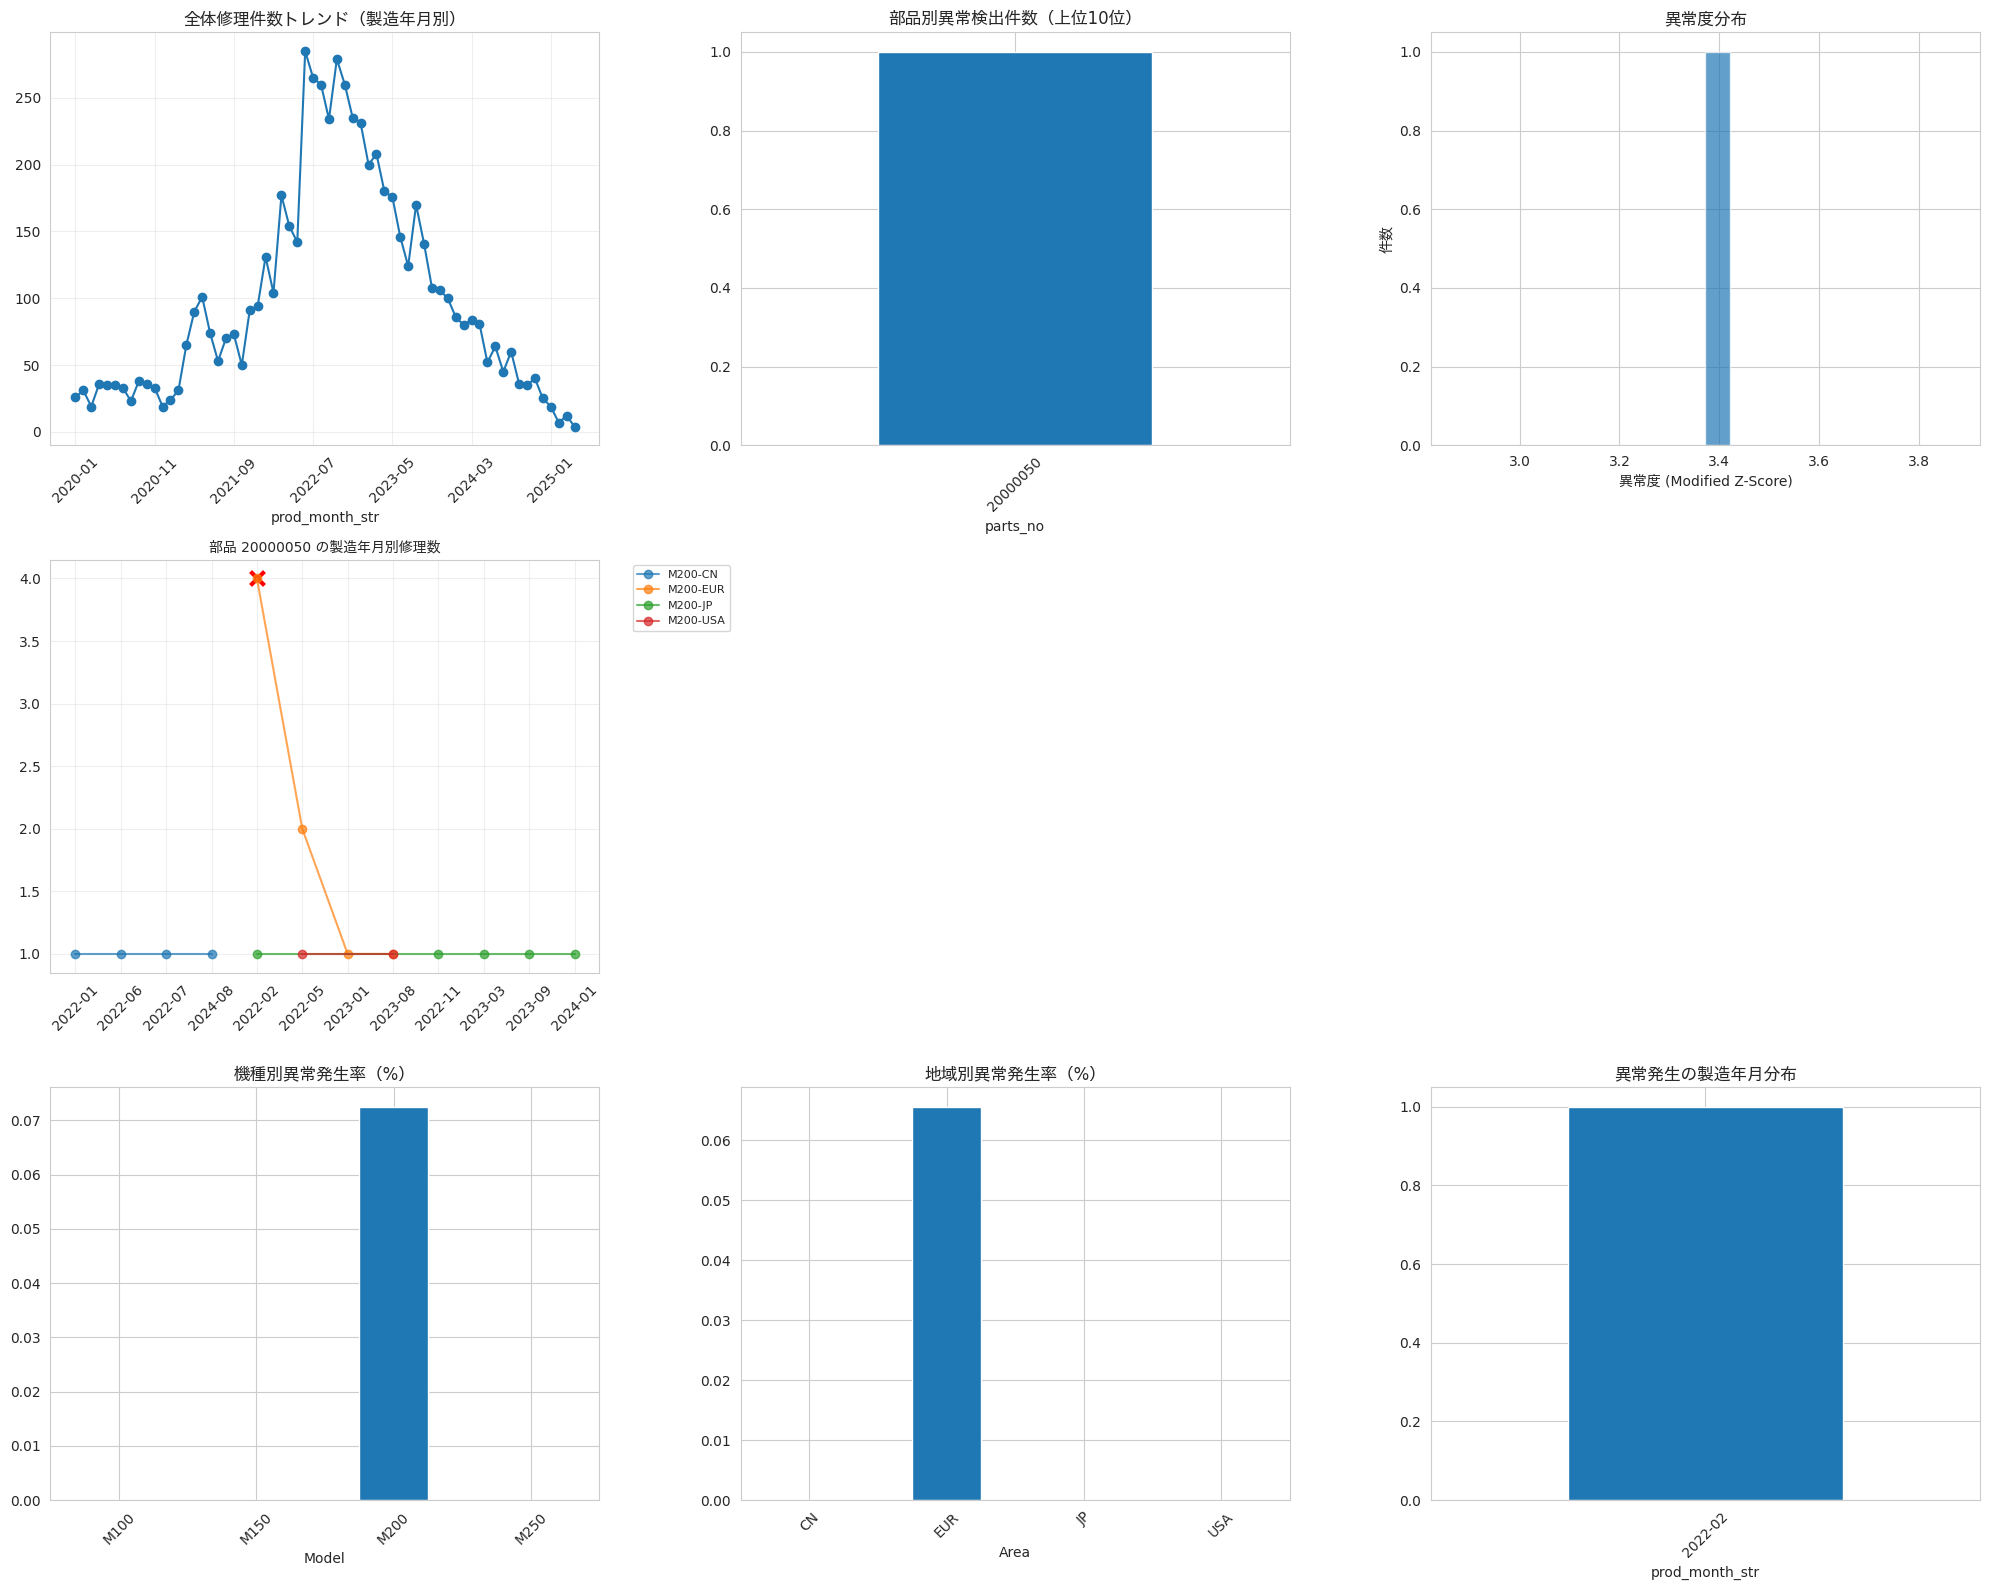


„ÄêË£ΩÈÄ†ÂìÅË≥™Áï∞Â∏∏Ê§úÁü•„É¨„Éù„Éº„Éà„Äë

üìä Ê§úÂá∫„Çµ„Éû„É™„Éº:
  - Áï∞Â∏∏Ê§úÂá∫‰ª∂Êï∞: 1‰ª∂
  - Áï∞Â∏∏ÈÉ®ÂìÅÊï∞: 1Á®ÆÈ°û
  - ÂΩ±ÈüøÊ©üÁ®ÆÊï∞: 1Ê©üÁ®Æ
  - ÂΩ±ÈüøÂú∞ÂüüÊï∞: 1Âú∞Âüü

üîç ÈáçË¶ÅÈÉ®ÂìÅTOP5:
  1. ÈÉ®ÂìÅÁï™Âè∑: 20000050
     - Áï∞Â∏∏‰ª∂Êï∞: 1.0‰ª∂
     - Âπ≥ÂùáÁï∞Â∏∏Â∫¶: 3.37
     - ÊúÄÂ§ß‰øÆÁêÜÊï∞: 4.0‰ª∂
     - ÂÑ™ÂÖàÂ∫¶„Çπ„Ç≥„Ç¢: 1.95


‚ö†Ô∏è  ÊúÄ„ÇÇÊ∑±Âàª„Å™Áï∞Â∏∏TOP3:
  1. ÈÉ®ÂìÅ: 20000050 | Ê©üÁ®Æ: M200 | Âú∞Âüü: EUR
     - Ë£ΩÈÄ†Âπ¥Êúà: 2022-02
     - ‰øÆÁêÜÊï∞: 4‰ª∂ (‰∏≠Â§ÆÂÄ§: 1.5‰ª∂)
     - Áï∞Â∏∏Â∫¶: 3.37



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Êó•Êú¨Ë™û„Éï„Ç©„É≥„ÉàË®≠ÂÆö
plt.rcParams['font.family'] = ['DejaVu Sans', 'Hiragino Sans', 'Yu Gothic', 'Meiryo', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

def manufacturing_quality_analysis(df_parts, threshold=3.0, min_samples=3):
    """Ë£ΩÈÄ†ÂìÅË≥™Áï∞Â∏∏Ê§úÁü•„Å®ÈÉ®ÂìÅÁµû„ÇäËæº„Åø"""
    
    print("=== Ë£ΩÈÄ†ÂìÅË≥™Áï∞Â∏∏Ê§úÁü•ÈñãÂßã ===")
    
    # ÈÉ®ÂìÅ‰ΩøÁî®Êï∞„ÅÆÈõÜË®àÔºàË£ΩÈÄ†Âπ¥ÊúàÂà•Ôºâ
    parts_usage = df_parts.groupby(['Model', 'Area', 'prod_month', 'parts_no']).agg({
        'IF_ID': 'nunique'  # ‰øÆÁêÜÊï∞
    }).reset_index()
    parts_usage.rename(columns={'IF_ID': 'repair_count'}, inplace=True)
    
    # period[M]„ÇíÊñáÂ≠óÂàó„Å´Â§âÊèõÔºàÂèØË¶ñÂåñ„ÅÆ„Åü„ÇÅÔºâ
    parts_usage['prod_month_str'] = parts_usage['prod_month'].astype(str)
    
    print(f"Á∑è„Éá„Éº„ÇøÊï∞: {len(parts_usage)}")
    print(f"ÂØæË±°ÈÉ®ÂìÅÊï∞: {parts_usage['parts_no'].nunique()}")
    print(f"ÂØæË±°Ê©üÁ®ÆÊï∞: {parts_usage['Model'].nunique()}")
    print(f"ÂØæË±°Âú∞ÂüüÊï∞: {parts_usage['Area'].nunique()}")
    
    return parts_usage

def detect_manufacturing_outliers(parts_usage, threshold=3.0, min_samples=3):
    """Ë£ΩÈÄ†Âπ¥Êúà„Å´„Çà„ÇãÁï∞Â∏∏Ê§úÁü•"""
    
    def modified_z_score(data):
        """‰øÆÊ≠£Z-ScoreË®àÁÆó"""
        median = np.median(data)
        mad = np.median(np.abs(data - median))
        if mad == 0:
            return np.zeros(len(data))
        return 0.6745 * (data - median) / mad
    
    results = []
    
    # Model √ó Area √ó parts_no „ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åî„Å®„Å´Áï∞Â∏∏Ê§úÁü•
    for (model, area, parts), group_data in parts_usage.groupby(['Model', 'Area', 'parts_no']):
        
        if len(group_data) < min_samples:
            continue
        
        # ‰øÆÊ≠£Z-ScoreË®àÁÆó
        repair_counts = group_data['repair_count'].values
        mod_z_scores = modified_z_score(repair_counts)
        
        # Áï∞Â∏∏Ê§úÁü•
        outlier_mask = np.abs(mod_z_scores) > threshold
        
        if np.any(outlier_mask):
            outliers = group_data[outlier_mask].copy()
            outliers['modified_z_score'] = mod_z_scores[outlier_mask]
            outliers['median_repair_count'] = np.median(repair_counts)
            outliers['max_repair_count'] = np.max(repair_counts)
            outliers['min_repair_count'] = np.min(repair_counts)
            outliers['outlier_severity'] = np.abs(mod_z_scores[outlier_mask])
            
            results.append(outliers)
    
    if results:
        outlier_results = pd.concat(results, ignore_index=True)
        return outlier_results.sort_values('outlier_severity', ascending=False)
    else:
        return pd.DataFrame()

def prioritize_parts_analysis(outlier_results):
    """ÈÉ®ÂìÅ„ÅÆÂÑ™ÂÖàÂ∫¶ÂàÜÊûê"""
    
    if len(outlier_results) == 0:
        print("Áï∞Â∏∏„ÅåÊ§úÂá∫„Åï„Çå„Åæ„Åõ„Çì„Åß„Åó„Åü„ÄÇ")
        return pd.DataFrame()
    
    # ÈÉ®ÂìÅÂà•„ÅÆÁï∞Â∏∏„Çµ„Éû„É™„Éº
    parts_summary = outlier_results.groupby('parts_no').agg({
        'outlier_severity': ['count', 'mean', 'max'],
        'repair_count': ['sum', 'mean', 'max'],
        'Model': 'nunique',
        'Area': 'nunique'
    }).round(2)
    
    # ÂàóÂêç„ÇíÂπ≥Âù¶Âåñ
    parts_summary.columns = [
        'abnormal_count', 'avg_severity', 'max_severity',
        'total_repairs', 'avg_repairs', 'max_repairs',
        'affected_models', 'affected_areas'
    ]
    
    # ÂÑ™ÂÖàÂ∫¶„Çπ„Ç≥„Ç¢Ë®àÁÆó
    parts_summary['priority_score'] = (
        parts_summary['abnormal_count'] * 0.3 +
        parts_summary['avg_severity'] * 0.4 +
        parts_summary['max_repairs'] / parts_summary['max_repairs'].max() * 0.3
    )
    
    return parts_summary.sort_values('priority_score', ascending=False)

def visualize_manufacturing_analysis(parts_usage, outlier_results, parts_summary, top_n=5):
    """Ë£ΩÈÄ†ÂìÅË≥™ÂàÜÊûê„ÅÆÂèØË¶ñÂåñ"""
    
    # Âõ≥„ÅÆ„Çµ„Ç§„Ç∫Ë®≠ÂÆö
    fig = plt.figure(figsize=(20, 16))
    
    # 1. ÂÖ®‰ΩìÁöÑ„Å™‰øÆÁêÜ‰ª∂Êï∞„Éà„É¨„É≥„Éâ
    ax1 = plt.subplot(3, 3, 1)
    monthly_trend = parts_usage.groupby('prod_month_str')['repair_count'].sum().sort_index()
    monthly_trend.plot(kind='line', marker='o', ax=ax1)
    ax1.set_title('ÂÖ®‰Ωì‰øÆÁêÜ‰ª∂Êï∞„Éà„É¨„É≥„ÉâÔºàË£ΩÈÄ†Âπ¥ÊúàÂà•Ôºâ', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)
    
    # 2. ÈÉ®ÂìÅÂà•Áï∞Â∏∏‰ª∂Êï∞Ôºà‰∏ä‰Ωç10‰ΩçÔºâ
    ax2 = plt.subplot(3, 3, 2)
    if len(parts_summary) > 0:
        top_parts = parts_summary.head(10)
        top_parts['abnormal_count'].plot(kind='bar', ax=ax2)
        ax2.set_title('ÈÉ®ÂìÅÂà•Áï∞Â∏∏Ê§úÂá∫‰ª∂Êï∞Ôºà‰∏ä‰Ωç10‰ΩçÔºâ', fontsize=12)
        ax2.tick_params(axis='x', rotation=45)
    
    # 3. Áï∞Â∏∏Â∫¶ÂàÜÂ∏É
    ax3 = plt.subplot(3, 3, 3)
    if len(outlier_results) > 0:
        outlier_results['outlier_severity'].hist(bins=20, ax=ax3, alpha=0.7)
        ax3.set_title('Áï∞Â∏∏Â∫¶ÂàÜÂ∏É', fontsize=12)
        ax3.set_xlabel('Áï∞Â∏∏Â∫¶ (Modified Z-Score)')
        ax3.set_ylabel('‰ª∂Êï∞')
    
    # 4-6. ‰∏ä‰Ωç3ÈÉ®ÂìÅ„ÅÆË©≥Á¥∞ÂàÜÊûê
    if len(parts_summary) > 0:
        top_3_parts = parts_summary.head(min(3, len(parts_summary))).index.tolist()
        
        for i, parts_no in enumerate(top_3_parts):
            ax = plt.subplot(3, 3, 4 + i)
            
            # Ë©≤ÂΩìÈÉ®ÂìÅ„ÅÆ„Éá„Éº„Çø„ÇíÊäΩÂá∫
            parts_data = parts_usage[parts_usage['parts_no'] == parts_no]
            outlier_data = outlier_results[outlier_results['parts_no'] == parts_no]
            
            # Ê©üÁ®Æ„ÉªÂú∞ÂüüÂà•„ÅÆÊôÇÁ≥ªÂàó„Éó„É≠„ÉÉ„Éà
            for (model, area), group in parts_data.groupby(['Model', 'Area']):
                group_sorted = group.sort_values('prod_month_str')
                ax.plot(group_sorted['prod_month_str'], group_sorted['repair_count'], 
                       marker='o', label=f'{model}-{area}', alpha=0.7)
                
                # Áï∞Â∏∏ÁÇπ„Çí„Éè„Ç§„É©„Ç§„Éà
                if len(outlier_data) > 0:
                    outlier_subset = outlier_data[
                        (outlier_data['Model'] == model) & 
                        (outlier_data['Area'] == area)
                    ]
                    if len(outlier_subset) > 0:
                        ax.scatter(outlier_subset['prod_month_str'], 
                                 outlier_subset['repair_count'],
                                 color='red', s=100, marker='x', linewidth=3)
            
            ax.set_title(f'ÈÉ®ÂìÅ {parts_no} „ÅÆË£ΩÈÄ†Âπ¥ÊúàÂà•‰øÆÁêÜÊï∞', fontsize=10)
            ax.tick_params(axis='x', rotation=45)
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
            ax.grid(True, alpha=0.3)
    
    # 7. Ê©üÁ®ÆÂà•Áï∞Â∏∏Áô∫ÁîüÁéá
    ax7 = plt.subplot(3, 3, 7)
    if len(outlier_results) > 0:
        model_abnormal = outlier_results.groupby('Model').size()
        model_total = parts_usage.groupby('Model').size()
        model_rate = (model_abnormal / model_total * 100).fillna(0)
        model_rate.plot(kind='bar', ax=ax7)
        ax7.set_title('Ê©üÁ®ÆÂà•Áï∞Â∏∏Áô∫ÁîüÁéáÔºà%Ôºâ', fontsize=12)
        ax7.tick_params(axis='x', rotation=45)
    
    # 8. Âú∞ÂüüÂà•Áï∞Â∏∏Áô∫ÁîüÁéá
    ax8 = plt.subplot(3, 3, 8)
    if len(outlier_results) > 0:
        area_abnormal = outlier_results.groupby('Area').size()
        area_total = parts_usage.groupby('Area').size()
        area_rate = (area_abnormal / area_total * 100).fillna(0)
        area_rate.plot(kind='bar', ax=ax8)
        ax8.set_title('Âú∞ÂüüÂà•Áï∞Â∏∏Áô∫ÁîüÁéáÔºà%Ôºâ', fontsize=12)
        ax8.tick_params(axis='x', rotation=45)
    
    # 9. Áï∞Â∏∏„ÅÆÊôÇÊúüÂàÜÂ∏É
    ax9 = plt.subplot(3, 3, 9)
    if len(outlier_results) > 0:
        time_dist = outlier_results.groupby('prod_month_str').size()
        time_dist.plot(kind='bar', ax=ax9)
        ax9.set_title('Áï∞Â∏∏Áô∫Áîü„ÅÆË£ΩÈÄ†Âπ¥ÊúàÂàÜÂ∏É', fontsize=12)
        ax9.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def generate_detailed_report(outlier_results, parts_summary):
    """Ë©≥Á¥∞„É¨„Éù„Éº„ÉàÁîüÊàê"""
    
    print("\n" + "="*60)
    print("„ÄêË£ΩÈÄ†ÂìÅË≥™Áï∞Â∏∏Ê§úÁü•„É¨„Éù„Éº„Éà„Äë")
    print("="*60)
    
    if len(outlier_results) == 0:
        print("Áï∞Â∏∏„ÅØÊ§úÂá∫„Åï„Çå„Åæ„Åõ„Çì„Åß„Åó„Åü„ÄÇ")
        return
    
    print(f"\nüìä Ê§úÂá∫„Çµ„Éû„É™„Éº:")
    print(f"  - Áï∞Â∏∏Ê§úÂá∫‰ª∂Êï∞: {len(outlier_results)}‰ª∂")
    print(f"  - Áï∞Â∏∏ÈÉ®ÂìÅÊï∞: {outlier_results['parts_no'].nunique()}Á®ÆÈ°û")
    print(f"  - ÂΩ±ÈüøÊ©üÁ®ÆÊï∞: {outlier_results['Model'].nunique()}Ê©üÁ®Æ")
    print(f"  - ÂΩ±ÈüøÂú∞ÂüüÊï∞: {outlier_results['Area'].nunique()}Âú∞Âüü")
    
    print(f"\nüîç ÈáçË¶ÅÈÉ®ÂìÅTOP5:")
    top_5_parts = parts_summary.head(5)
    for i, (parts_no, row) in enumerate(top_5_parts.iterrows(), 1):
        print(f"  {i}. ÈÉ®ÂìÅÁï™Âè∑: {parts_no}")
        print(f"     - Áï∞Â∏∏‰ª∂Êï∞: {row['abnormal_count']}‰ª∂")
        print(f"     - Âπ≥ÂùáÁï∞Â∏∏Â∫¶: {row['avg_severity']:.2f}")
        print(f"     - ÊúÄÂ§ß‰øÆÁêÜÊï∞: {row['max_repairs']}‰ª∂")
        print(f"     - ÂÑ™ÂÖàÂ∫¶„Çπ„Ç≥„Ç¢: {row['priority_score']:.2f}")
        print()
    
    print(f"\n‚ö†Ô∏è  ÊúÄ„ÇÇÊ∑±Âàª„Å™Áï∞Â∏∏TOP3:")
    top_severe = outlier_results.nlargest(3, 'outlier_severity')
    for i, (_, row) in enumerate(top_severe.iterrows(), 1):
        print(f"  {i}. ÈÉ®ÂìÅ: {row['parts_no']} | Ê©üÁ®Æ: {row['Model']} | Âú∞Âüü: {row['Area']}")
        print(f"     - Ë£ΩÈÄ†Âπ¥Êúà: {row['prod_month_str']}")
        print(f"     - ‰øÆÁêÜÊï∞: {row['repair_count']}‰ª∂ (‰∏≠Â§ÆÂÄ§: {row['median_repair_count']:.1f}‰ª∂)")
        print(f"     - Áï∞Â∏∏Â∫¶: {row['outlier_severity']:.2f}")
        print()

# „É°„Ç§„É≥ÂÆüË°åÈñ¢Êï∞
def run_manufacturing_quality_analysis(df_parts, threshold=3.0, min_samples=3):
    """Ë£ΩÈÄ†ÂìÅË≥™ÂàÜÊûê„ÅÆÂÆüË°å"""
    
    # 1. „Éá„Éº„ÇøÊ∫ñÂÇô
    parts_usage = manufacturing_quality_analysis(df_parts, threshold, min_samples)
    
    # 2. Áï∞Â∏∏Ê§úÁü•
    print("\nÁï∞Â∏∏Ê§úÁü•„ÇíÂÆüË°å‰∏≠...")
    outlier_results = detect_manufacturing_outliers(parts_usage, threshold, min_samples)
    
    # 3. ÈÉ®ÂìÅÂÑ™ÂÖàÂ∫¶ÂàÜÊûê
    print("ÈÉ®ÂìÅÂÑ™ÂÖàÂ∫¶ÂàÜÊûê‰∏≠...")
    parts_summary = prioritize_parts_analysis(outlier_results)
    
    # 4. ÂèØË¶ñÂåñ
    print("ÂèØË¶ñÂåñ„ÇíÁîüÊàê‰∏≠...")
    visualize_manufacturing_analysis(parts_usage, outlier_results, parts_summary)
    
    # 5. Ë©≥Á¥∞„É¨„Éù„Éº„Éà
    generate_detailed_report(outlier_results, parts_summary)
    
    return {
        'parts_usage': parts_usage,
        'outlier_results': outlier_results,
        'parts_summary': parts_summary
    }

# ‰ΩøÁî®‰æã
df_parts = repair_df.copy()
results = run_manufacturing_quality_analysis(
    df_parts, 
    threshold=3.0,      # Áï∞Â∏∏Ê§úÁü•„ÅÆÈñæÂÄ§
    min_samples=3       # ÊúÄÂ∞è„Çµ„É≥„Éó„É´Êï∞
)

# 

# 

# Ë£ΩÈÄ†Êó•„Å®Âú∞ÂüüÂ∑Æ„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ
**ÂìÅË≥™‰øùË®ºÊãÖÂΩìËÄÖÔºàQAÔºâ**: Ë£ΩÈÄ†ÂìÅË≥™„Å®Âú∞ÂüüÊÄß„ÅÆÁµÑ„ÅøÂêà„Çè„ÅõÂàÜÊûê„ÄÅ„Å®„Å¶„ÇÇËâØ„ÅÑË¶ñÁÇπ„Åß„Åô„Å≠ÔºÅÁâπÂÆö„ÅÆË£ΩÈÄ†ÊôÇÊúü„ÅÆË£ΩÂìÅ„ÅåÁâπÂÆöÂú∞Âüü„ÅßÁï∞Â∏∏„Å´ÊïÖÈöú„Åô„ÇãÂ†¥Âêà„ÄÅË£ΩÈÄ†Â∑•Á®ã„ÅÆÂïèÈ°å„Åã„ÄÅÂú∞ÂüüÁâπÊúâ„ÅÆ‰ΩøÁî®Áí∞Â¢É„ÅÆÂïèÈ°å„Åã„ÇíÂà§Âà•„Åß„Åç„Åæ„Åô„ÄÇ

**„Éá„Éº„Çø„Çµ„Ç§„Ç®„É≥„ÉÜ„Ç£„Çπ„ÉàÔºàDSÔºâ**: Áµ±Ë®àÁöÑ„Å´„ÅØ„Äå‰∫åÂÖÉÈÖçÁΩÆÂàÜÊï£ÂàÜÊûê„ÄçÁöÑ„Å™„Ç¢„Éó„É≠„Éº„ÉÅ„Åß„ÄÅË£ΩÈÄ†Âπ¥Êúà„Å®Âú∞Âüü„ÅÆ‰∫§‰∫í‰ΩúÁî®ÂäπÊûú„ÇíÊ§úÂá∫„Åô„Çã„Åì„Å®„Å´„Å™„Çä„Åæ„Åô„Å≠„ÄÇ

## 1. Ë£ΩÈÄ†ÂìÅË≥™√óÂú∞ÂüüÊÄß„ÅÆÁµÑ„ÅøÂêà„Çè„ÅõÁï∞Â∏∏Ê§úÁü•**ÂìÅË≥™‰øùË®ºÊãÖÂΩìËÄÖÔºàQAÔºâ**: „Åì„ÅÆ„Ç∑„Çπ„ÉÜ„É†„Åß„ÅØ3„Å§„ÅÆÁï∞„Å™„Çã„Çø„Ç§„Éó„ÅÆÁï∞Â∏∏„ÇíÊ§úÂá∫„Åß„Åç„Åæ„ÅôÔºö

1. **ÂÄãÂà•Áï∞Â∏∏** - ÁâπÂÆö„ÅÆË£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åß‰øÆÁêÜÊï∞„ÅåÁ™ÅÂá∫„Åó„Å¶„ÅÑ„Çã
2. **‰∫§‰∫í‰ΩúÁî®Áï∞Â∏∏** - Ë£ΩÈÄ†Âπ¥Êúà„Å®Âú∞Âüü„ÅÆÁõ∏‰∫í‰ΩúÁî®„Å´„Çà„Çã‰∫àÊúü„Åó„Å™„ÅÑÁï∞Â∏∏„Éë„Çø„Éº„É≥
3. **„Éë„Çø„Éº„É≥Áï∞Â∏∏** - ÁâπÂÆö„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„ÅåÁ∂ôÁ∂öÁöÑ„Å´Áï∞Â∏∏ÂÄ§„ÇíÁ§∫„Åô

**„Éá„Éº„Çø„Çµ„Ç§„Ç®„É≥„ÉÜ„Ç£„Çπ„ÉàÔºàDSÔºâ**: Áµ±Ë®àÁöÑ„Å´„ÅØ‰ª•‰∏ã„ÅÆÊâãÊ≥ï„ÇíÁµÑ„ÅøÂêà„Çè„Åõ„Å¶„ÅÑ„Åæ„ÅôÔºö

- **‰øÆÊ≠£Z-Score**: Â§ñ„ÇåÂÄ§„Å´È†ëÂÅ•„Å™Áï∞Â∏∏Ê§úÁü•
- **‰∫§‰∫í‰ΩúÁî®ÂäπÊûúÂàÜÊûê**: ‰∫åÂÖÉÈÖçÁΩÆÂàÜÊï£ÂàÜÊûê„ÅÆÊ¶ÇÂøµ„ÇíÂøúÁî®
- **„Éë„Çø„Éº„É≥ÂàÜÊûê**: ÊôÇÁ≥ªÂàó√óÂú∞Âüü„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Éë„Çø„Éº„É≥„ÅÆÁï∞Â∏∏Ê§úÁü•

## ‰∏ª„Å™Ê©üËÉΩ„Å®ÁâπÂæ¥

###

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# Êó•Êú¨Ë™û„Éï„Ç©„É≥„ÉàË®≠ÂÆö
plt.rcParams['font.family'] = ['DejaVu Sans', 'Hiragino Sans', 'Yu Gothic', 'Meiryo', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

class ManufacturingRegionalAnalyzer:
    """Ë£ΩÈÄ†ÂìÅË≥™√óÂú∞ÂüüÊÄß„ÅÆÁµÑ„ÅøÂêà„Çè„ÅõÁï∞Â∏∏Ê§úÁü•„Ç∑„Çπ„ÉÜ„É†"""
    
    def __init__(self, threshold=3.0, min_samples=3, interaction_threshold=2.5):
        self.threshold = threshold
        self.min_samples = min_samples
        self.interaction_threshold = interaction_threshold
        
    def prepare_data(self, df_parts):
        """„Éá„Éº„ÇøÊ∫ñÂÇô"""
        print("=== Ë£ΩÈÄ†ÂìÅË≥™√óÂú∞ÂüüÊÄßÁµÑ„ÅøÂêà„Çè„ÅõÂàÜÊûêÈñãÂßã ===")
        
        # ÈÉ®ÂìÅ‰ΩøÁî®Êï∞„ÅÆÈõÜË®à
        parts_usage = df_parts.groupby(['Model', 'prod_month', 'Area', 'parts_no']).agg({
            'IF_ID': 'nunique'
        }).reset_index()
        parts_usage.rename(columns={'IF_ID': 'repair_count'}, inplace=True)
        
        # period[M]„ÇíÊñáÂ≠óÂàó„Å´Â§âÊèõ
        parts_usage['prod_month_str'] = parts_usage['prod_month'].astype(str)
        
        print(f"Á∑è„Éá„Éº„ÇøÊï∞: {len(parts_usage)}")
        print(f"ÂØæË±°ÈÉ®ÂìÅÊï∞: {parts_usage['parts_no'].nunique()}")
        print(f"ÂØæË±°Ê©üÁ®ÆÊï∞: {parts_usage['Model'].nunique()}")
        print(f"Ë£ΩÈÄ†Âπ¥ÊúàÊï∞: {parts_usage['prod_month'].nunique()}")
        print(f"ÂØæË±°Âú∞ÂüüÊï∞: {parts_usage['Area'].nunique()}")
        
        return parts_usage
    
    def detect_interaction_anomalies(self, parts_usage):
        """Ë£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü„ÅÆ‰∫§‰∫í‰ΩúÁî®Áï∞Â∏∏Ê§úÁü•"""
        
        def modified_z_score(data):
            """‰øÆÊ≠£Z-ScoreË®àÁÆó"""
            median = np.median(data)
            mad = np.median(np.abs(data - median))
            if mad == 0:
                return np.zeros(len(data))
            return 0.6745 * (data - median) / mad
        
        def calculate_interaction_effect(group_data):
            """‰∫§‰∫í‰ΩúÁî®ÂäπÊûú„ÅÆË®àÁÆó"""
            # Ë£ΩÈÄ†Âπ¥Êúà„ÅÆ‰∏ªÂäπÊûú
            month_means = group_data.groupby('prod_month_str')['repair_count'].mean()
            overall_mean = group_data['repair_count'].mean()
            
            # Âú∞Âüü„ÅÆ‰∏ªÂäπÊûú
            area_means = group_data.groupby('Area')['repair_count'].mean()
            
            interaction_effects = []
            
            for _, row in group_data.iterrows():
                month_effect = month_means[row['prod_month_str']] - overall_mean
                area_effect = area_means[row['Area']] - overall_mean
                
                # ÊúüÂæÖÂÄ§Ôºà‰∏ªÂäπÊûú„ÅÆ„ÅøÔºâ
                expected = overall_mean + month_effect + area_effect
                
                # ‰∫§‰∫í‰ΩúÁî®ÂäπÊûú
                interaction = row['repair_count'] - expected
                interaction_effects.append(interaction)
            
            return np.array(interaction_effects)
        
        results = {
            'individual_anomalies': [],
            'interaction_anomalies': [],
            'pattern_anomalies': []
        }
        
        # Ê©üÁ®Æ√óÈÉ®ÂìÅ„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åî„Å®„Å´ÂàÜÊûê
        for (model, parts), group_data in parts_usage.groupby(['Model', 'parts_no']):
            
            if len(group_data) < self.min_samples:
                continue
            
            # 1. ÂÄãÂà•Áï∞Â∏∏Ê§úÁü•ÔºàË£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü„ÅÆÁµÑ„ÅøÂêà„Çè„ÅõÔºâ
            repair_counts = group_data['repair_count'].values
            mod_z_scores = modified_z_score(repair_counts)
            
            individual_outliers = np.abs(mod_z_scores) > self.threshold
            
            if np.any(individual_outliers):
                outliers_data = group_data[individual_outliers].copy()
                outliers_data['modified_z_score'] = mod_z_scores[individual_outliers]
                outliers_data['outlier_severity'] = np.abs(mod_z_scores[individual_outliers])
                outliers_data['anomaly_type'] = 'individual'
                results['individual_anomalies'].append(outliers_data)
            
            # 2. ‰∫§‰∫í‰ΩúÁî®ÂäπÊûú„ÅÆÁï∞Â∏∏Ê§úÁü•
            if len(group_data['prod_month_str'].unique()) > 1 and len(group_data['Area'].unique()) > 1:
                interaction_effects = calculate_interaction_effect(group_data)
                interaction_z_scores = modified_z_score(interaction_effects)
                
                interaction_outliers = np.abs(interaction_z_scores) > self.interaction_threshold
                
                if np.any(interaction_outliers):
                    outliers_data = group_data[interaction_outliers].copy()
                    outliers_data['interaction_effect'] = interaction_effects[interaction_outliers]
                    outliers_data['interaction_z_score'] = interaction_z_scores[interaction_outliers]
                    outliers_data['outlier_severity'] = np.abs(interaction_z_scores[interaction_outliers])
                    outliers_data['anomaly_type'] = 'interaction'
                    results['interaction_anomalies'].append(outliers_data)
            
            # 3. „Éë„Çø„Éº„É≥Áï∞Â∏∏Ê§úÁü•ÔºàÁâπÂÆö„ÅÆË£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åå‰∏ÄË≤´„Åó„Å¶È´ò„ÅÑÔºâ
            if len(group_data) >= 6:  # ÂçÅÂàÜ„Å™„Éá„Éº„Çø„Åå„ÅÇ„ÇãÂ†¥Âêà
                pattern_anomalies = self._detect_pattern_anomalies(group_data, model, parts)
                if len(pattern_anomalies) > 0:
                    results['pattern_anomalies'].append(pattern_anomalies)
        
        # ÁµêÊûú„ÇíDataFrame„Å´Áµ±Âêà
        all_results = {}
        for anomaly_type, anomaly_list in results.items():
            if anomaly_list:
                all_results[anomaly_type] = pd.concat(anomaly_list, ignore_index=True)
            else:
                all_results[anomaly_type] = pd.DataFrame()
        
        return all_results
    
    def _detect_pattern_anomalies(self, group_data, model, parts):
        """„Éë„Çø„Éº„É≥Áï∞Â∏∏„ÅÆÊ§úÁü•"""
        # Ë£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åî„Å®„ÅÆÂπ≥Âùá„ÇíË®àÁÆó
        combo_means = group_data.groupby(['prod_month_str', 'Area'])['repair_count'].mean()
        
        if len(combo_means) < 3:
            return pd.DataFrame()
        
        # ÂÖ®‰Ωì„ÅÆÂàÜÂ∏É„Åã„ÇâÂ§ñ„Çå„ÇãÁµÑ„ÅøÂêà„Çè„Åõ„ÇíÊ§úÂá∫
        z_scores = (combo_means - combo_means.mean()) / combo_means.std()
        
        pattern_outliers = np.abs(z_scores) > self.threshold
        
        if np.any(pattern_outliers):
            outlier_combos = combo_means[pattern_outliers].index
            
            pattern_data = []
            for month, area in outlier_combos:
                combo_data = group_data[
                    (group_data['prod_month_str'] == month) & 
                    (group_data['Area'] == area)
                ]
                
                if len(combo_data) > 0:
                    combo_data = combo_data.copy()
                    combo_data['pattern_z_score'] = z_scores[(month, area)]
                    combo_data['outlier_severity'] = abs(z_scores[(month, area)])
                    combo_data['anomaly_type'] = 'pattern'
                    pattern_data.append(combo_data)
            
            if pattern_data:
                return pd.concat(pattern_data, ignore_index=True)
        
        return pd.DataFrame()
    
    def prioritize_parts_comprehensive(self, anomaly_results):
        """ÂåÖÊã¨ÁöÑ„Å™ÈÉ®ÂìÅÂÑ™ÂÖàÂ∫¶ÂàÜÊûê"""
        
        all_anomalies = []
        
        # ÂÖ®„Å¶„ÅÆÁï∞Â∏∏„Çø„Ç§„Éó„ÇíÁµ±Âêà
        for anomaly_type, df in anomaly_results.items():
            if len(df) > 0:
                df_copy = df.copy()
                df_copy['detection_method'] = anomaly_type
                all_anomalies.append(df_copy)
        
        if not all_anomalies:
            return pd.DataFrame()
        
        combined_anomalies = pd.concat(all_anomalies, ignore_index=True)
        
        # ÈÉ®ÂìÅÂà•„ÅÆÂåÖÊã¨ÁöÑ„Çµ„Éû„É™„Éº
        parts_summary = combined_anomalies.groupby('parts_no').agg({
            'outlier_severity': ['count', 'mean', 'max', 'std'],
            'repair_count': ['sum', 'mean', 'max'],
            'Model': 'nunique',
            'Area': 'nunique',
            'prod_month_str': 'nunique',
            'detection_method': lambda x: len(x.unique())
        }).round(2)
        
        # ÂàóÂêç„ÇíÂπ≥Âù¶Âåñ
        parts_summary.columns = [
            'total_anomalies', 'avg_severity', 'max_severity', 'severity_std',
            'total_repairs', 'avg_repairs', 'max_repairs',
            'affected_models', 'affected_areas', 'affected_months',
            'detection_methods'
        ]
        
        # Áï∞Â∏∏„Çø„Ç§„ÉóÂà•„ÅÆÁµ±Ë®à
        anomaly_type_stats = combined_anomalies.groupby(['parts_no', 'detection_method']).size().unstack(fill_value=0)
        
        # ÂÑ™ÂÖàÂ∫¶„Çπ„Ç≥„Ç¢„ÅÆË®àÁÆó
        parts_summary['complexity_score'] = (
            parts_summary['affected_models'] * parts_summary['affected_areas'] * 
            parts_summary['affected_months']
        )
        
        parts_summary['priority_score'] = (
            parts_summary['total_anomalies'] * 0.25 +
            parts_summary['avg_severity'] * 0.30 +
            parts_summary['max_severity'] * 0.20 +
            parts_summary['complexity_score'] / parts_summary['complexity_score'].max() * 0.15 +
            parts_summary['detection_methods'] * 0.10
        )
        
        return parts_summary.sort_values('priority_score', ascending=False), anomaly_type_stats
    
    def create_comprehensive_visualization(self, parts_usage, anomaly_results, parts_summary, anomaly_type_stats):
        """ÂåÖÊã¨ÁöÑ„Å™ÂèØË¶ñÂåñ"""
        
        fig = plt.figure(figsize=(24, 20))
        
        # Ëâ≤„ÅÆË®≠ÂÆö
        colors = {
            'individual': '#FF6B6B',
            'interaction': '#4ECDC4', 
            'pattern': '#45B7D1'
        }
        
        # 1. ÂÖ®‰Ωì„Éà„É¨„É≥„ÉâÔºàË£ΩÈÄ†Âπ¥Êúà√óÂú∞ÂüüÔºâ
        ax1 = plt.subplot(4, 4, 1)
        pivot_data = parts_usage.pivot_table(
            values='repair_count', 
            index='prod_month_str', 
            columns='Area', 
            aggfunc='sum'
        ).fillna(0)
        
        sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax1, cbar_kws={'label': '‰øÆÁêÜÊï∞'})
        ax1.set_title('Ë£ΩÈÄ†Âπ¥Êúà√óÂú∞ÂüüÂà•‰øÆÁêÜÊï∞„Éí„Éº„Éà„Éû„ÉÉ„Éó', fontsize=12)
        ax1.set_xlabel('Âú∞Âüü')
        ax1.set_ylabel('Ë£ΩÈÄ†Âπ¥Êúà')
        
        # 2. Áï∞Â∏∏„Çø„Ç§„ÉóÂà•‰ª∂Êï∞
        ax2 = plt.subplot(4, 4, 2)
        anomaly_counts = {k: len(v) for k, v in anomaly_results.items() if len(v) > 0}
        if anomaly_counts:
            bars = ax2.bar(anomaly_counts.keys(), anomaly_counts.values(), 
                          color=[colors.get(k, '#95A5A6') for k in anomaly_counts.keys()])
            ax2.set_title('Áï∞Â∏∏„Çø„Ç§„ÉóÂà•Ê§úÂá∫‰ª∂Êï∞', fontsize=12)
            ax2.set_ylabel('‰ª∂Êï∞')
            
            # Ê£í„Ç∞„É©„Éï„Å´ÂÄ§„ÇíË°®Á§∫
            for bar in bars:
                height = bar.get_height()
                ax2.text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height)}', ha='center', va='bottom')
        
        # 3. ÈÉ®ÂìÅÂÑ™ÂÖàÂ∫¶„Çπ„Ç≥„Ç¢Ôºà‰∏ä‰Ωç15‰ΩçÔºâ
        ax3 = plt.subplot(4, 4, 3)
        if len(parts_summary) > 0:
            top_parts = parts_summary.head(15)
            bars = ax3.barh(range(len(top_parts)), top_parts['priority_score'])
            ax3.set_yticks(range(len(top_parts)))
            ax3.set_yticklabels(top_parts.index, fontsize=8)
            ax3.set_title('ÈÉ®ÂìÅÂÑ™ÂÖàÂ∫¶„Çπ„Ç≥„Ç¢Ôºà‰∏ä‰Ωç15‰ΩçÔºâ', fontsize=12)
            ax3.set_xlabel('ÂÑ™ÂÖàÂ∫¶„Çπ„Ç≥„Ç¢')
            ax3.invert_yaxis()
        
        # 4. Áï∞Â∏∏„ÅÆÂú∞ÂüüÂàÜÂ∏É
        ax4 = plt.subplot(4, 4, 4)
        all_anomalies = pd.concat([df for df in anomaly_results.values() if len(df) > 0], ignore_index=True)
        if len(all_anomalies) > 0:
            area_counts = all_anomalies['Area'].value_counts()
            ax4.pie(area_counts.values, labels=area_counts.index, autopct='%1.1f%%', startangle=90)
            ax4.set_title('Áï∞Â∏∏Áô∫ÁîüÂú∞ÂüüÂàÜÂ∏É', fontsize=12)
        
        # 5-8. ‰∏ä‰Ωç4ÈÉ®ÂìÅ„ÅÆË©≥Á¥∞ÂàÜÊûê
        if len(parts_summary) > 0:
            top_4_parts = parts_summary.head(4).index.tolist()
            
            for i, parts_no in enumerate(top_4_parts):
                ax = plt.subplot(4, 4, 5 + i)
                
                # Ë©≤ÂΩìÈÉ®ÂìÅ„ÅÆ„Éá„Éº„Çø
                parts_data = parts_usage[parts_usage['parts_no'] == parts_no]
                
                # Ë£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü„ÅÆ„Éí„Éº„Éà„Éû„ÉÉ„Éó
                parts_pivot = parts_data.pivot_table(
                    values='repair_count',
                    index='prod_month_str',
                    columns='Area',
                    aggfunc='sum'
                ).fillna(0)
                
                if not parts_pivot.empty:
                    sns.heatmap(parts_pivot, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax, 
                               cbar_kws={'label': '‰øÆÁêÜÊï∞'})
                    
                    # Áï∞Â∏∏ÁÇπ„Çí„Ç™„Éº„Éê„Éº„É¨„Ç§
                    for anomaly_type, anomaly_df in anomaly_results.items():
                        if len(anomaly_df) > 0:
                            parts_anomalies = anomaly_df[anomaly_df['parts_no'] == parts_no]
                            
                            for _, row in parts_anomalies.iterrows():
                                try:
                                    month_idx = parts_pivot.index.get_loc(row['prod_month_str'])
                                    area_idx = parts_pivot.columns.get_loc(row['Area'])
                                    
                                    # Áï∞Â∏∏ÁÇπ„ÇíÊû†„ÅßÂõ≤„ÇÄ
                                    rect = plt.Rectangle((area_idx, month_idx), 1, 1, 
                                                       fill=False, edgecolor=colors[anomaly_type], 
                                                       linewidth=3)
                                    ax.add_patch(rect)
                                except:
                                    continue
                
                ax.set_title(f'ÈÉ®ÂìÅ {parts_no} Áï∞Â∏∏ÂàÜÊûê', fontsize=10)
                ax.set_xlabel('Âú∞Âüü')
                ax.set_ylabel('Ë£ΩÈÄ†Âπ¥Êúà')
        
        # 9. Áï∞Â∏∏„ÅÆÊôÇÁ≥ªÂàóÂàÜÂ∏É
        ax9 = plt.subplot(4, 4, 9)
        if len(all_anomalies) > 0:
            time_dist = all_anomalies.groupby(['prod_month_str', 'anomaly_type']).size().unstack(fill_value=0)
            time_dist.plot(kind='bar', stacked=True, ax=ax9, 
                          color=[colors.get(col, '#95A5A6') for col in time_dist.columns])
            ax9.set_title('Áï∞Â∏∏Áô∫Áîü„ÅÆÊôÇÁ≥ªÂàóÂàÜÂ∏É', fontsize=12)
            ax9.set_xlabel('Ë£ΩÈÄ†Âπ¥Êúà')
            ax9.set_ylabel('Áï∞Â∏∏‰ª∂Êï∞')
            ax9.tick_params(axis='x', rotation=45)
            ax9.legend(title='Áï∞Â∏∏„Çø„Ç§„Éó')
        
        # 10. Ê©üÁ®ÆÂà•Áï∞Â∏∏„Éë„Çø„Éº„É≥
        ax10 = plt.subplot(4, 4, 10)
        if len(all_anomalies) > 0:
            model_pattern = all_anomalies.groupby(['Model', 'anomaly_type']).size().unstack(fill_value=0)
            model_pattern.plot(kind='bar', ax=ax10,
                              color=[colors.get(col, '#95A5A6') for col in model_pattern.columns])
            ax10.set_title('Ê©üÁ®ÆÂà•Áï∞Â∏∏„Éë„Çø„Éº„É≥', fontsize=12)
            ax10.set_xlabel('Ê©üÁ®Æ')
            ax10.set_ylabel('Áï∞Â∏∏‰ª∂Êï∞')
            ax10.tick_params(axis='x', rotation=45)
            ax10.legend(title='Áï∞Â∏∏„Çø„Ç§„Éó')
        
        # 11. Áï∞Â∏∏Â∫¶ÂàÜÂ∏ÉÊØîËºÉ
        ax11 = plt.subplot(4, 4, 11)
        if len(all_anomalies) > 0:
            for anomaly_type in all_anomalies['anomaly_type'].unique():
                type_data = all_anomalies[all_anomalies['anomaly_type'] == anomaly_type]
                ax11.hist(type_data['outlier_severity'], alpha=0.6, 
                         label=f'{anomaly_type} (n={len(type_data)})',
                         color=colors.get(anomaly_type, '#95A5A6'))
            
            ax11.set_title('Áï∞Â∏∏„Çø„Ç§„ÉóÂà•Áï∞Â∏∏Â∫¶ÂàÜÂ∏É', fontsize=12)
            ax11.set_xlabel('Áï∞Â∏∏Â∫¶')
            ax11.set_ylabel('È†ªÂ∫¶')
            ax11.legend()
        
        # 12. ÈÉ®ÂìÅÂà•Áï∞Â∏∏„Çø„Ç§„ÉóÂàÜÂ∏É
        ax12 = plt.subplot(4, 4, 12)
        if len(anomaly_type_stats) > 0:
            top_parts_anomaly = anomaly_type_stats.head(10)
            top_parts_anomaly.plot(kind='bar', stacked=True, ax=ax12,
                                  color=[colors.get(col, '#95A5A6') for col in top_parts_anomaly.columns])
            ax12.set_title('ÈÉ®ÂìÅÂà•Áï∞Â∏∏„Çø„Ç§„ÉóÂàÜÂ∏ÉÔºà‰∏ä‰Ωç10‰ΩçÔºâ', fontsize=12)
            ax12.set_xlabel('ÈÉ®ÂìÅÁï™Âè∑')
            ax12.set_ylabel('Áï∞Â∏∏‰ª∂Êï∞')
            ax12.tick_params(axis='x', rotation=45)
            ax12.legend(title='Áï∞Â∏∏„Çø„Ç§„Éó')
        
        # 13-16. Áï∞Â∏∏„Éë„Çø„Éº„É≥„ÅÆË©≥Á¥∞ÂàÜÊûê
        for i, (anomaly_type, anomaly_df) in enumerate(anomaly_results.items()):
            if len(anomaly_df) > 0 and i < 4:
                ax = plt.subplot(4, 4, 13 + i)
                
                # Áï∞Â∏∏„ÅÆÂú∞Âüü√óË£ΩÈÄ†Âπ¥ÊúàÂàÜÂ∏É
                if len(anomaly_df) > 0:
                    anomaly_pivot = anomaly_df.pivot_table(
                        values='outlier_severity',
                        index='prod_month_str',
                        columns='Area',
                        aggfunc='mean'
                    ).fillna(0)
                    
                    if not anomaly_pivot.empty:
                        sns.heatmap(anomaly_pivot, annot=True, fmt='.1f', 
                                   cmap='Reds', ax=ax, cbar_kws={'label': 'Âπ≥ÂùáÁï∞Â∏∏Â∫¶'})
                        ax.set_title(f'{anomaly_type}Áï∞Â∏∏„ÅÆÂàÜÂ∏É', fontsize=10)
                        ax.set_xlabel('Âú∞Âüü')
                        ax.set_ylabel('Ë£ΩÈÄ†Âπ¥Êúà')
        
        plt.tight_layout()
        plt.show()
    
    def generate_comprehensive_report(self, anomaly_results, parts_summary, anomaly_type_stats):
        """ÂåÖÊã¨ÁöÑ„É¨„Éù„Éº„ÉàÁîüÊàê"""
        
        print("\n" + "="*80)
        print("„ÄêË£ΩÈÄ†ÂìÅË≥™√óÂú∞ÂüüÊÄßÁµÑ„ÅøÂêà„Çè„ÅõÁï∞Â∏∏Ê§úÁü•„É¨„Éù„Éº„Éà„Äë")
        print("="*80)
        
        # ÂÖ®‰Ωì„Çµ„Éû„É™„Éº
        total_anomalies = sum(len(df) for df in anomaly_results.values())
        
        print(f"\nüìä Á∑èÂêà„Çµ„Éû„É™„Éº:")
        print(f"  - Á∑èÁï∞Â∏∏Ê§úÂá∫‰ª∂Êï∞: {total_anomalies}‰ª∂")
        
        for anomaly_type, anomaly_df in anomaly_results.items():
            if len(anomaly_df) > 0:
                print(f"  - {anomaly_type}Áï∞Â∏∏: {len(anomaly_df)}‰ª∂")
        
        if len(parts_summary) > 0:
            print(f"  - Áï∞Â∏∏ÈÉ®ÂìÅÊï∞: {len(parts_summary)}Á®ÆÈ°û")
            print(f"  - ÂΩ±ÈüøÊ©üÁ®ÆÊï∞: {parts_summary['affected_models'].sum()}Ê©üÁ®Æ")
            print(f"  - ÂΩ±ÈüøÂú∞ÂüüÊï∞: {parts_summary['affected_areas'].sum()}Âú∞Âüü")
        
        # Áï∞Â∏∏„Çø„Ç§„ÉóÂà•„ÅÆË©≥Á¥∞
        print(f"\nüîç Áï∞Â∏∏„Çø„Ç§„ÉóÂà•Ë©≥Á¥∞:")
        
        anomaly_descriptions = {
            'individual': 'ÂÄãÂà•Áï∞Â∏∏ - ÁâπÂÆö„ÅÆË£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åß‰øÆÁêÜÊï∞„ÅåÁï∞Â∏∏„Å´Â§ö„ÅÑ',
            'interaction': '‰∫§‰∫í‰ΩúÁî®Áï∞Â∏∏ - Ë£ΩÈÄ†Âπ¥Êúà„Å®Âú∞Âüü„ÅÆÁõ∏‰∫í‰ΩúÁî®„Å´„Çà„Çã‰∫àÊúü„Åó„Å™„ÅÑÁï∞Â∏∏',
            'pattern': '„Éë„Çø„Éº„É≥Áï∞Â∏∏ - ÁâπÂÆö„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åå‰∏ÄË≤´„Åó„Å¶Áï∞Â∏∏ÂÄ§„ÇíÁ§∫„Åô'
        }
        
        for anomaly_type, anomaly_df in anomaly_results.items():
            if len(anomaly_df) > 0:
                print(f"\n  „Äê{anomaly_type}Áï∞Â∏∏„Äë")
                print(f"  {anomaly_descriptions.get(anomaly_type, '')}")
                print(f"  - Ê§úÂá∫‰ª∂Êï∞: {len(anomaly_df)}‰ª∂")
                print(f"  - Âπ≥ÂùáÁï∞Â∏∏Â∫¶: {anomaly_df['outlier_severity'].mean():.2f}")
                print(f"  - ÊúÄÂ§ßÁï∞Â∏∏Â∫¶: {anomaly_df['outlier_severity'].max():.2f}")
                print(f"  - Èñ¢ÈÄ£ÈÉ®ÂìÅÊï∞: {anomaly_df['parts_no'].nunique()}Á®ÆÈ°û")
        
        # ÈáçË¶ÅÈÉ®ÂìÅTOP5
        if len(parts_summary) > 0:
            print(f"\nüö® ÊúÄÈáçË¶ÅÈÉ®ÂìÅTOP5:")
            top_5_parts = parts_summary.head(5)
            for i, (parts_no, row) in enumerate(top_5_parts.iterrows(), 1):
                print(f"  {i}. ÈÉ®ÂìÅÁï™Âè∑: {parts_no}")
                print(f"     - Á∑èÁï∞Â∏∏‰ª∂Êï∞: {row['total_anomalies']}‰ª∂")
                print(f"     - Âπ≥ÂùáÁï∞Â∏∏Â∫¶: {row['avg_severity']:.2f}")
                print(f"     - ÂΩ±ÈüøÁØÑÂõ≤: {row['affected_models']}Ê©üÁ®Æ √ó {row['affected_areas']}Âú∞Âüü √ó {row['affected_months']}Ë£ΩÈÄ†Êúà")
                print(f"     - Ê§úÂá∫ÊâãÊ≥ïÊï∞: {row['detection_methods']}Á®ÆÈ°û")
                print(f"     - ÂÑ™ÂÖàÂ∫¶„Çπ„Ç≥„Ç¢: {row['priority_score']:.2f}")
                print()
        
        # ÊúÄ„ÇÇÊ∑±Âàª„Å™Áï∞Â∏∏TOP3
        all_anomalies = pd.concat([df for df in anomaly_results.values() if len(df) > 0], ignore_index=True)
        if len(all_anomalies) > 0:
            print(f"\n‚ö†Ô∏è  ÊúÄ„ÇÇÊ∑±Âàª„Å™Áï∞Â∏∏TOP3:")
            top_severe = all_anomalies.nlargest(3, 'outlier_severity')
            for i, (_, row) in enumerate(top_severe.iterrows(), 1):
                print(f"  {i}. ÈÉ®ÂìÅ: {row['parts_no']} | Ê©üÁ®Æ: {row['Model']}")
                print(f"     - Ë£ΩÈÄ†Âπ¥Êúà: {row['prod_month_str']} | Âú∞Âüü: {row['Area']}")
                print(f"     - ‰øÆÁêÜÊï∞: {row['repair_count']}‰ª∂")
                print(f"     - Áï∞Â∏∏Â∫¶: {row['outlier_severity']:.2f}")
                print(f"     - Áï∞Â∏∏„Çø„Ç§„Éó: {row['anomaly_type']}")
                print()
        
        # Êé®Â•®„Ç¢„ÇØ„Ç∑„Éß„É≥
        print(f"\nüí° Êé®Â•®„Ç¢„ÇØ„Ç∑„Éß„É≥:")
        if len(parts_summary) > 0:
            high_priority_parts = parts_summary[parts_summary['priority_score'] >= parts_summary['priority_score'].quantile(0.8)]
            print(f"  1. È´òÂÑ™ÂÖàÂ∫¶ÈÉ®ÂìÅ({len(high_priority_parts)}Á®ÆÈ°û)„ÅÆË©≥Á¥∞Ë™øÊüª")
            
            interaction_anomalies = anomaly_results.get('interaction', pd.DataFrame())
            if len(interaction_anomalies) > 0:
                print(f"  2. ‰∫§‰∫í‰ΩúÁî®Áï∞Â∏∏({len(interaction_anomalies)}‰ª∂)„ÅÆË£ΩÈÄ†Â∑•Á®ã„Å®Âú∞ÂüüÁí∞Â¢É„ÅÆ‰∏°Èù¢Ë™øÊüª")
            
            pattern_anomalies = anomaly_results.get('pattern', pd.DataFrame())
            if len(pattern_anomalies) > 0:
                print(f"  3. „Éë„Çø„Éº„É≥Áï∞Â∏∏({len(pattern_anomalies)}‰ª∂)„ÅÆ‰ΩìÁ≥ªÁöÑ„Å™Ê†πÊú¨ÂéüÂõ†ÂàÜÊûê")
            
            print(f"  4. Ë£ΩÈÄ†Âπ¥Êúà√óÂú∞Âüü„Éû„Éà„É™„ÉÉ„ÇØ„Çπ„Åß„ÅÆÂìÅË≥™ÁÆ°ÁêÜ‰ΩìÂà∂„ÅÆË¶ãÁõ¥„Åó")

# ‰ΩøÁî®‰æã
def run_comprehensive_analysis(df_parts, threshold=3.0, interaction_threshold=2.5, min_samples=3):
    """ÂåÖÊã¨ÁöÑÂàÜÊûê„ÅÆÂÆüË°å"""
    
    # „Ç¢„Éä„É©„Ç§„Ç∂„Éº„ÅÆÂàùÊúüÂåñ
    analyzer = ManufacturingRegionalAnalyzer(
        threshold=threshold,
        min_samples=min_samples,
        interaction_threshold=interaction_threshold
    )
    
    # 1. „Éá„Éº„ÇøÊ∫ñÂÇô
    parts_usage = analyzer.prepare_data(df_parts)
    
    # 2. Áï∞Â∏∏Ê§úÁü•
    print("\nÁï∞Â∏∏Ê§úÁü•„ÇíÂÆüË°å‰∏≠...")
    anomaly_results = analyzer.detect_interaction_anomalies(parts_usage)
    
    # 3. ÈÉ®ÂìÅÂÑ™ÂÖàÂ∫¶ÂàÜÊûê
    print("ÈÉ®ÂìÅÂÑ™ÂÖàÂ∫¶ÂàÜÊûê‰∏≠...")
    parts_summary, anomaly_type_stats = analyzer.prioritize_parts_comprehensive(anomaly_results)
    
    # 4. ÂèØË¶ñÂåñ
    print("ÂèØË¶ñÂåñ„ÇíÁîüÊàê‰∏≠...")
    analyzer.create_comprehensive_visualization(parts_usage, anomaly_results, parts_summary, anomaly_type_stats)
    
    # 5. Ë©≥Á¥∞„É¨„Éù„Éº„Éà
    analyzer.generate_comprehensive_report(anomaly_results, parts_summary, anomaly_type_stats)
    
    return {
        'parts_usage': parts_usage,
        'anomaly_results': anomaly_results,
        'parts_summary': parts_summary,
        'anomaly_type_stats': anomaly_type_stats,
        'analyzer': analyzer
    }

# ÂÆüË°å‰æã
df_parts = repair_df.copy()
results = run_comprehensive_analysis(
     df_parts,
     threshold=3.0,                # ÂÄãÂà•Áï∞Â∏∏Ê§úÁü•„ÅÆÈñæÂÄ§
     interaction_threshold=2.5,    # ‰∫§‰∫í‰ΩúÁî®Áï∞Â∏∏Ê§úÁü•„ÅÆÈñæÂÄ§  
     min_samples=3                 # ÊúÄÂ∞è„Çµ„É≥„Éó„É´Êï∞
)

=== Ë£ΩÈÄ†ÂìÅË≥™√óÂú∞ÂüüÊÄßÁµÑ„ÅøÂêà„Çè„ÅõÂàÜÊûêÈñãÂßã ===
Á∑è„Éá„Éº„ÇøÊï∞: 5782
ÂØæË±°ÈÉ®ÂìÅÊï∞: 260
ÂØæË±°Ê©üÁ®ÆÊï∞: 4
Ë£ΩÈÄ†Âπ¥ÊúàÊï∞: 64
ÂØæË±°Âú∞ÂüüÊï∞: 4

Áï∞Â∏∏Ê§úÁü•„ÇíÂÆüË°å‰∏≠...


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: 

ÈÉ®ÂìÅÂÑ™ÂÖàÂ∫¶ÂàÜÊûê‰∏≠...
ÂèØË¶ñÂåñ„ÇíÁîüÊàê‰∏≠...


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: 